## Exploratory Data Analysis (EDA)

Load the dataset, inspect the data, obtain descriptive statistics, create visualizations to understand the distribution of variables and their relationships, and identify null values and outliers.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/insurance.csv')

print("First rows of the DataFrame:")
display(df.head())

print("\nDescriptive statistics:")
display(df.describe())

print("\nInformation about data types:")
df.info()

print("\nNull values by column:")
display(df.isnull().sum())

Primeiras linhas do DataFrame:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Estatísticas descritivas:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Informações sobre os tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Valores nulos por coluna:


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


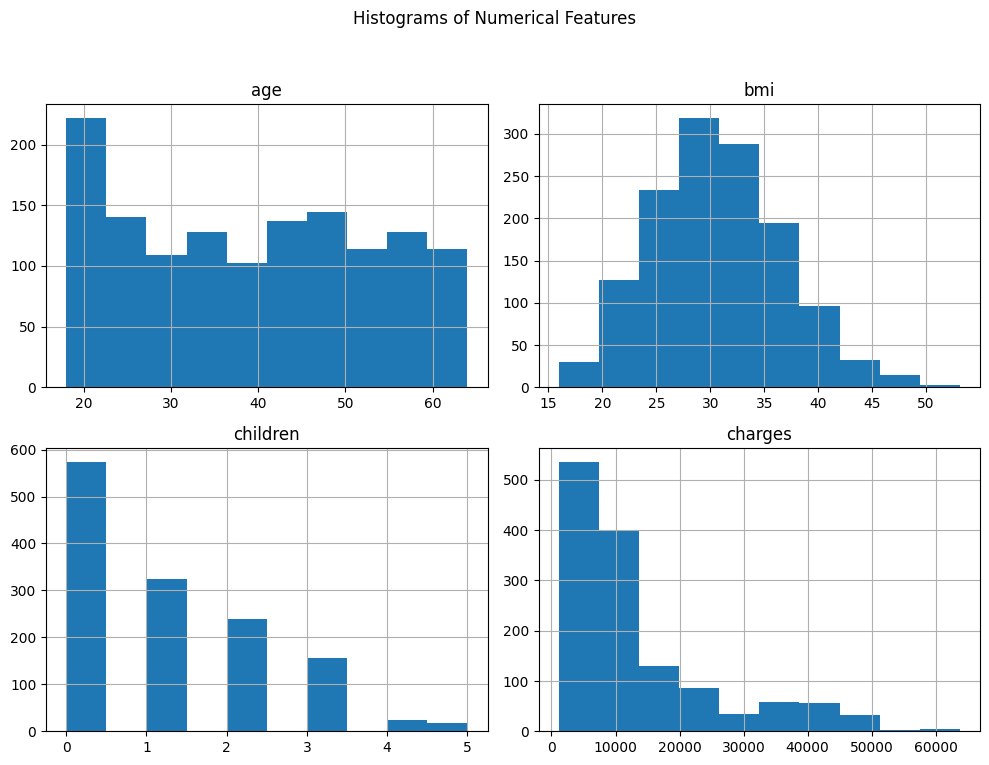

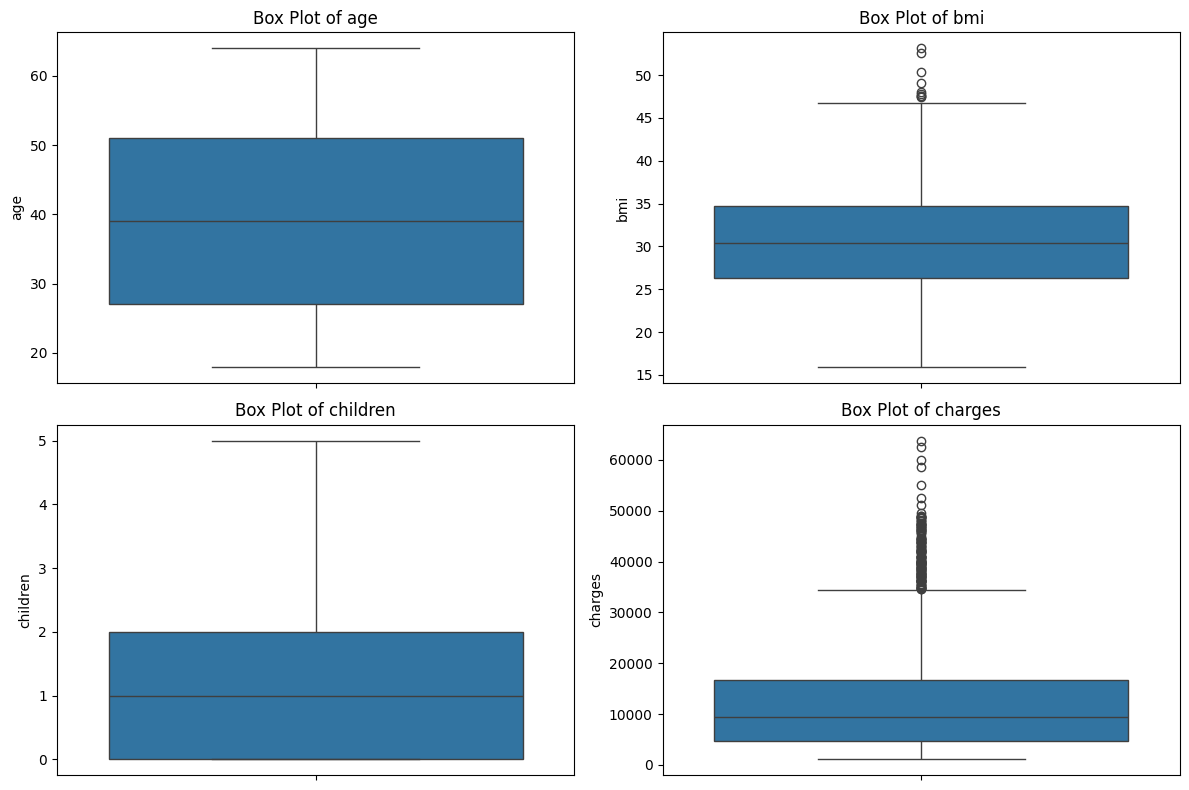

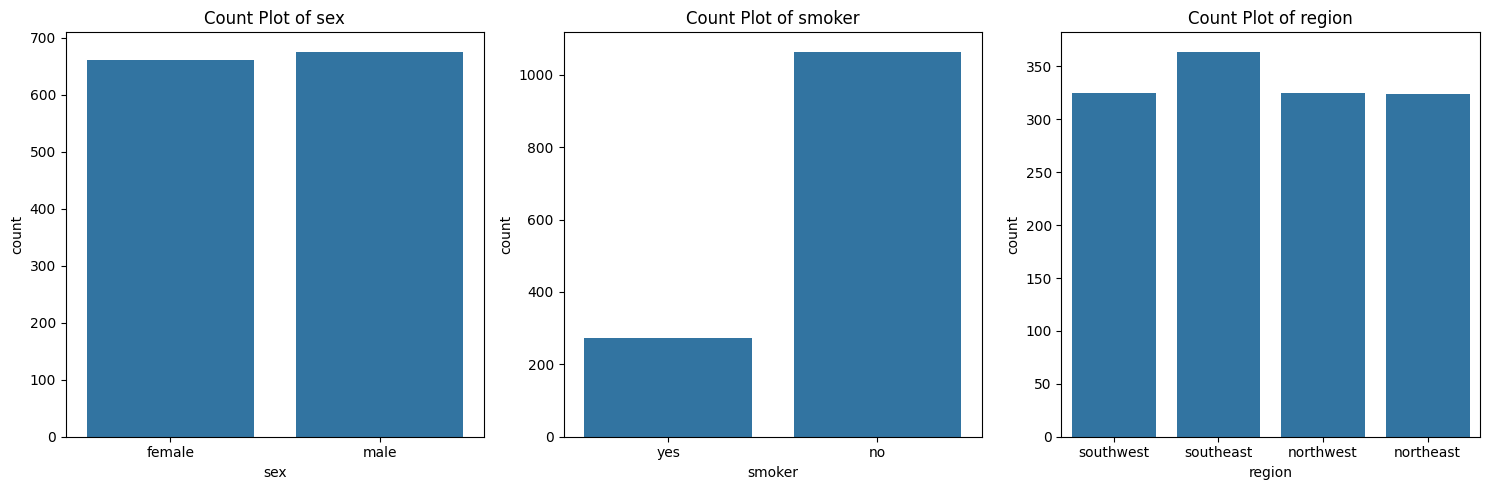

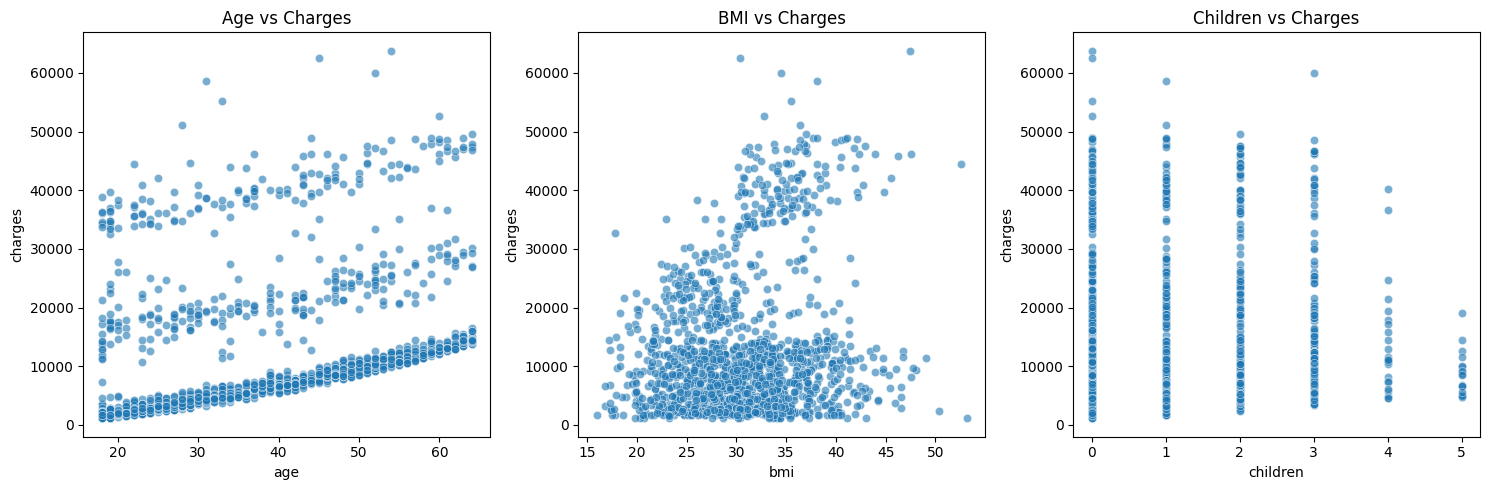

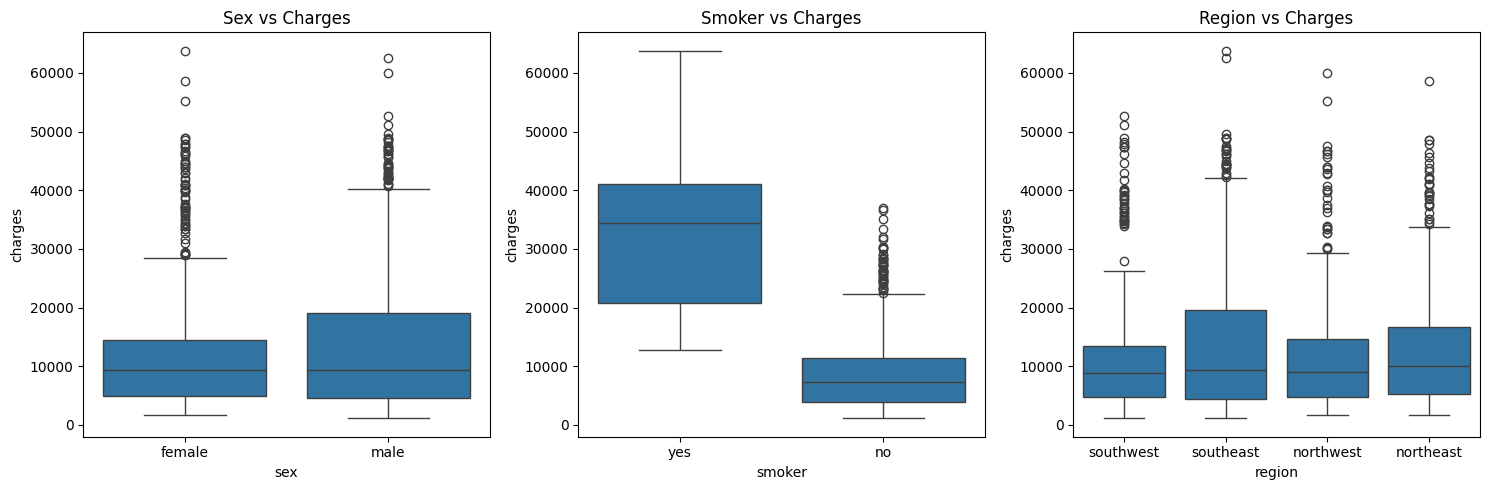

In [ ]:
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

numerical_cols = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

categorical_cols = ['sex', 'smoker', 'region']
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['age'], y=df['charges'], alpha=0.6)
plt.title('Age vs Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['bmi'], y=df['charges'], alpha=0.6)
plt.title('BMI vs Charges')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['children'], y=df['charges'], alpha=0.6)
plt.title('Children vs Charges')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs Charges')
plt.tight_layout()
plt.show()

## Preprocessing

Handle null values (if any), encode categorical variables using One-Hot Encoding, and scale numerical variables.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_processed = df.copy()

categorical_features = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns

target = 'charges'
numerical_features = numerical_features.drop(target)


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_processed_data = preprocessing_pipeline.fit_transform(df_processed)


encoded_categorical_feature_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(encoded_categorical_feature_names)

df_processed = pd.DataFrame(df_processed_data, columns=all_feature_names)

df_processed[target] = df[target]

print("Processed DataFrame head:")
display(df_processed.head())

print("\nProcessed DataFrame info:")
df_processed.info()

Processed DataFrame head:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520



Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   sex_female        1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_no         1338 non-null   float64
 6   smoker_yes        1338 non-null   float64
 7   region_northeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_southeast  1338 non-null   float64
 10  region_southwest  1338 non-null   float64
 11  charges           1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


## Building and Evaluating Models

Split the data into training and testing sets, create feature engineering (if necessary), train different regression models (Linear, Polynomial, Decision Tree, Random Forest, Gradient Boosting), evaluate the performance of the models using metrics such as R², MAE, MSE, and RMSE, and use cross-validation to ensure the robustness of the models.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_processed = df.copy()

categorical_features = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns

target = 'charges'
numerical_features = numerical_features.drop(target)


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_processed_data = preprocessing_pipeline.fit_transform(df_processed)


encoded_categorical_feature_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(encoded_categorical_feature_names)

df_processed = pd.DataFrame(df_processed_data, columns=all_feature_names)

df_processed[target] = df[target]

print("Processed DataFrame head:")
display(df_processed.head())

print("\nProcessed DataFrame info:")
df_processed.info()

Processed DataFrame head:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520



Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   sex_female        1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_no         1338 non-null   float64
 6   smoker_yes        1338 non-null   float64
 7   region_northeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_southeast  1338 non-null   float64
 10  region_southwest  1338 non-null   float64
 11  charges           1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_processed = df.copy()

categorical_features = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns

target = 'charges'
numerical_features = numerical_features.drop(target)

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_processed_data = preprocessing_pipeline.fit_transform(df_processed)


encoded_categorical_feature_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(encoded_categorical_feature_names)

df_processed = pd.DataFrame(df_processed_data, columns=all_feature_names)

df_processed[target] = df[target]

print("Processed DataFrame head:")
display(df_processed.head())

print("\nProcessed DataFrame info:")
df_processed.info()

Processed DataFrame head:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520



Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   sex_female        1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_no         1338 non-null   float64
 6   smoker_yes        1338 non-null   float64
 7   region_northeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_southeast  1338 non-null   float64
 10  region_southwest  1338 non-null   float64
 11  charges           1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_processed = df.copy()

categorical_features = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns

target = 'charges'
numerical_features = numerical_features.drop(target)


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_processed_data = preprocessing_pipeline.fit_transform(df_processed)


encoded_categorical_feature_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(encoded_categorical_feature_names)

df_processed = pd.DataFrame(df_processed_data, columns=all_feature_names)

df_processed[target] = df[target]

print("Processed DataFrame head:")
display(df_processed.head())

print("\nProcessed DataFrame info:")
df_processed.info()

Processed DataFrame head:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520



Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   sex_female        1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_no         1338 non-null   float64
 6   smoker_yes        1338 non-null   float64
 7   region_northeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_southeast  1338 non-null   float64
 10  region_southwest  1338 non-null   float64
 11  charges           1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df_processed.drop('charges', axis=1)
y = df_processed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
models['Polynomial Regression'] = LinearRegression()


results = {}

for name, model in models.items():
    print(f"--- Training and Evaluating {name} ---")

    if name == 'Polynomial Regression':
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
        cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    print(f"Cross-validation R² scores: {cv_scores}")
    print(f"Mean Cross-validation R²: {cv_scores.mean():.4f}")
    print("-" * 30)

    results[name] = {
        'R²': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'CV R² Scores': cv_scores,
        'Mean CV R²': cv_scores.mean()
    }

results_df = pd.DataFrame(results).T
display(results_df)

--- Training and Evaluating Linear Regression ---
R²: 0.7836
MAE: 4181.19
MSE: 33596915.85
RMSE: 5796.28
Cross-validation R² scores: [0.71585461 0.80210564 0.72296123 0.65784333 0.76678575]
Mean Cross-validation R²: 0.7331
------------------------------
--- Training and Evaluating Decision Tree Regressor ---
R²: 0.7664
MAE: 2872.69
MSE: 36267377.31
RMSE: 6022.24
Cross-validation R² scores: [0.74347693 0.74448513 0.64425941 0.64674287 0.77322176]
Mean Cross-validation R²: 0.7104
------------------------------
--- Training and Evaluating Random Forest Regressor ---
R²: 0.8644
MAE: 2540.99
MSE: 21051201.60
RMSE: 4588.16
Cross-validation R² scores: [0.81826039 0.90182486 0.79947213 0.78704847 0.83529393]
Mean Cross-validation R²: 0.8284
------------------------------
--- Training and Evaluating Gradient Boosting Regressor ---
R²: 0.8789
MAE: 2405.96
MSE: 18798533.40
RMSE: 4335.73
Cross-validation R² scores: [0.83298097 0.91745173 0.82020499 0.7943049  0.84208876]
Mean Cross-validation R²: 

,R²,MAE,MSE,RMSE,CV R² Scores,Mean CV R²
Linear Regression,0.783593,4181.194474,33596915.851361,5796.284659,"[0.7158546147406502, 0.8021056366029099, 0.722...",0.73311
Decision Tree Regressor,0.766392,2872.689636,36267377.306756,6022.240223,"[0.7434769308681206, 0.744485125979649, 0.6442...",0.710437
Random Forest Regressor,0.864403,2540.993475,21051201.598937,4588.158846,"[0.818260391325077, 0.9018248600966519, 0.7994...",0.82838
Gradient Boosting Regressor,0.878913,2405.961837,18798533.400645,4335.727551,"[0.8329809664096288, 0.9174517283550518, 0.820...",0.841406
Polynomial Regression,0.866583,2729.500134,20712805.987918,4551.132385,"[0.8248066163492053, 0.8947520581816875, 0.799...",0.826845


## Analysis and Interpretation
Identify the most important features for each model and analyze the model errors through predicted vs. actual plots and residuals.


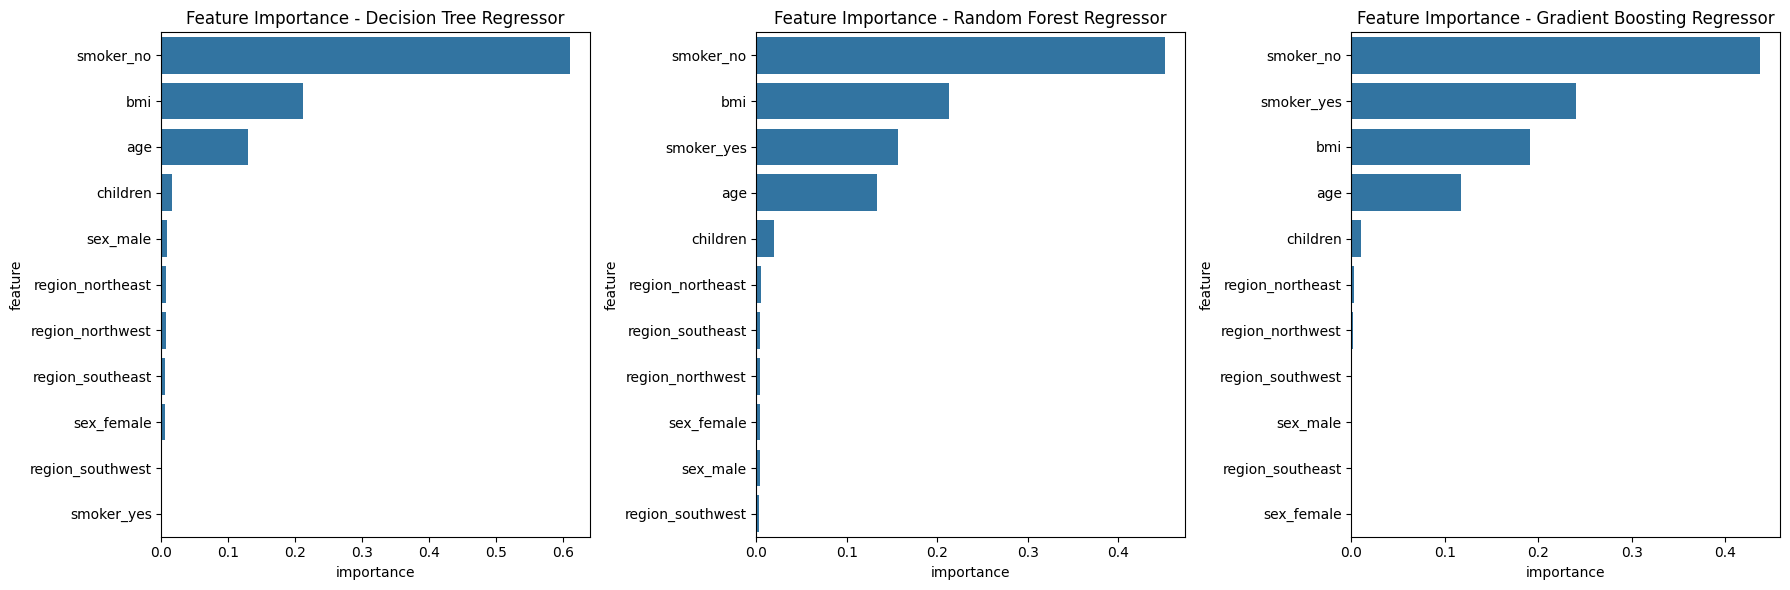

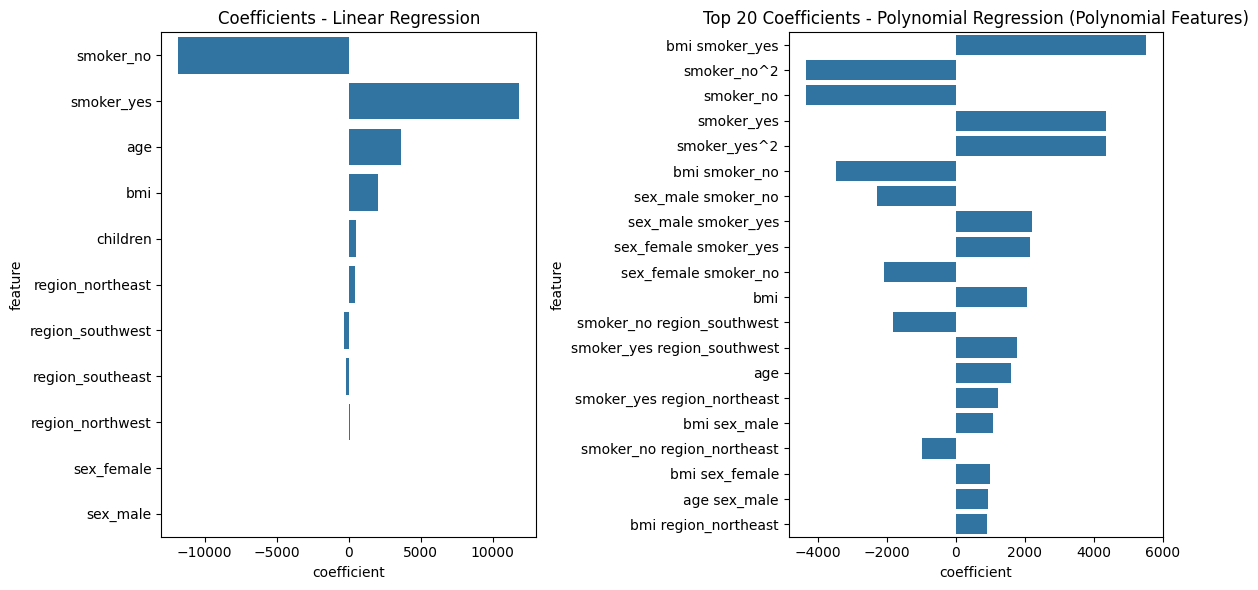

--- Analyzing Errors for Linear Regression ---


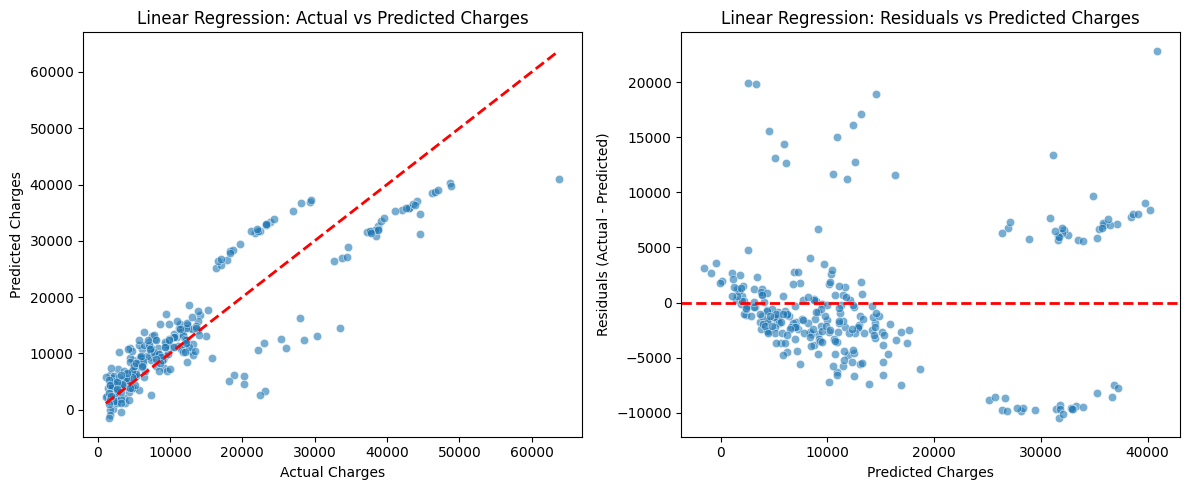

Analysis of Residuals for Linear Regression:
Observe the residual plots above. Ideally, residuals should be randomly scattered around zero.
Patterns in the residuals suggest potential issues like heteroscedasticity or that the model is not capturing the underlying relationship well.
------------------------------
--- Analyzing Errors for Decision Tree Regressor ---


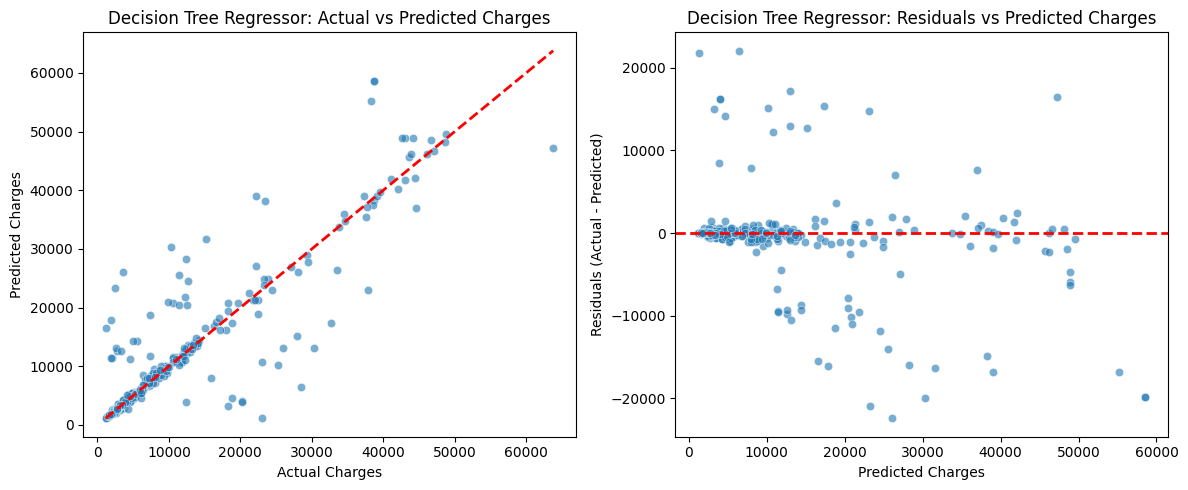

Analysis of Residuals for Decision Tree Regressor:
Observe the residual plots above. Ideally, residuals should be randomly scattered around zero.
Patterns in the residuals suggest potential issues like heteroscedasticity or that the model is not capturing the underlying relationship well.
------------------------------
--- Analyzing Errors for Random Forest Regressor ---


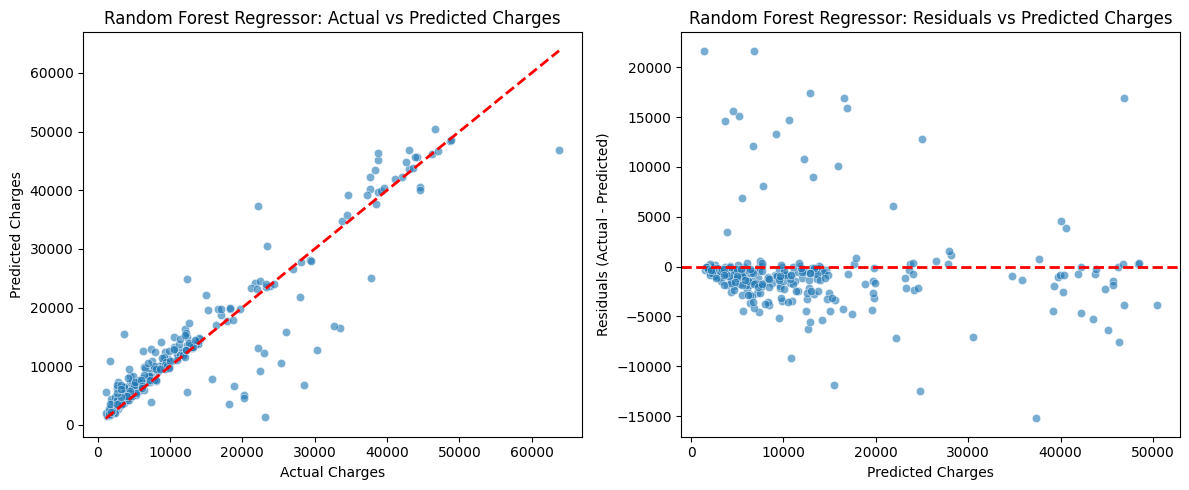

Analysis of Residuals for Random Forest Regressor:
Observe the residual plots above. Ideally, residuals should be randomly scattered around zero.
Patterns in the residuals suggest potential issues like heteroscedasticity or that the model is not capturing the underlying relationship well.
------------------------------
--- Analyzing Errors for Gradient Boosting Regressor ---


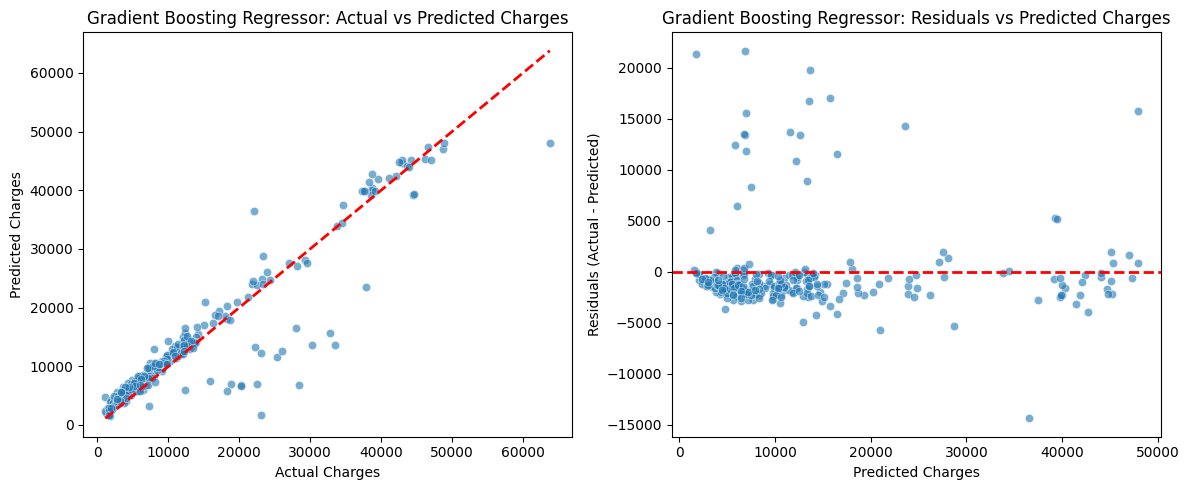

Analysis of Residuals for Gradient Boosting Regressor:
Observe the residual plots above. Ideally, residuals should be randomly scattered around zero.
Patterns in the residuals suggest potential issues like heteroscedasticity or that the model is not capturing the underlying relationship well.
------------------------------
--- Analyzing Errors for Polynomial Regression ---


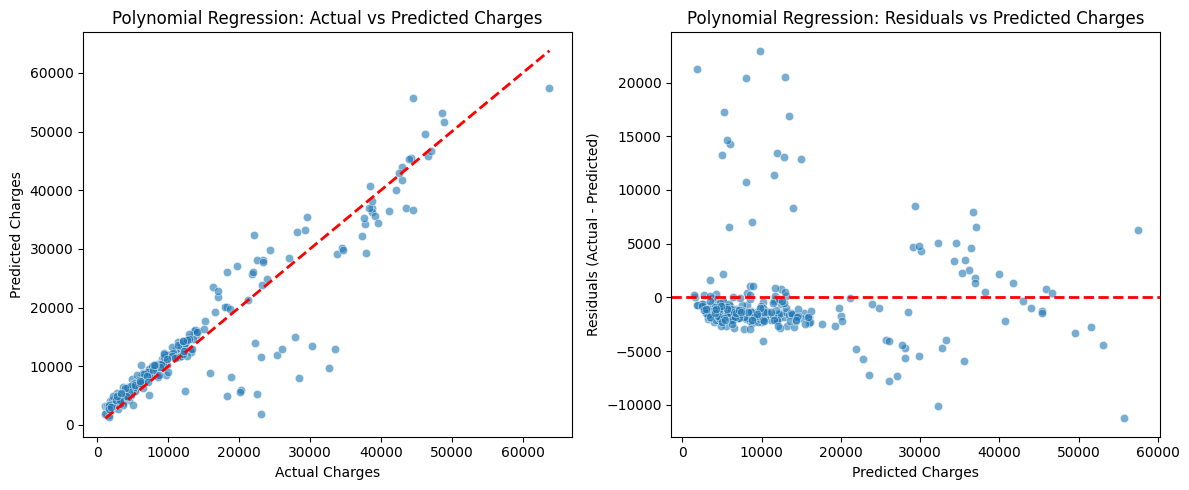

Analysis of Residuals for Polynomial Regression:
Observe the residual plots above. Ideally, residuals should be randomly scattered around zero.
Patterns in the residuals suggest potential issues like heteroscedasticity or that the model is not capturing the underlying relationship well.
------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

tree_models = ['Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor']
plt.figure(figsize=(18, 6))

for i, name in enumerate(tree_models):
    model = models[name]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X_train.columns
        importance_df = pd.DataFrame({'feature': features, 'importance': importances}).sort_values('importance', ascending=False)

        plt.subplot(1, 3, i + 1)
        sns.barplot(x='importance', y='feature', data=importance_df)
        plt.title(f'Feature Importance - {name}')
plt.tight_layout()
plt.show()

linear_models = ['Linear Regression', 'Polynomial Regression']
plt.figure(figsize=(12, 6))

for i, name in enumerate(linear_models):
    model = models[name]
    if hasattr(model, 'coef_'):
        coefs = model.coef_
        if name == 'Linear Regression':
            features = X_train.columns
            coef_df = pd.DataFrame({'feature': features, 'coefficient': coefs}).sort_values('coefficient', key=abs, ascending=False)
            plt.subplot(1, 2, i + 1)
            sns.barplot(x='coefficient', y='feature', data=coef_df)
            plt.title(f'Coefficients - {name}')
        elif name == 'Polynomial Regression':

            poly_feature_names = poly.get_feature_names_out(X_train.columns)
            coef_df = pd.DataFrame({'feature': poly_feature_names, 'coefficient': coefs}).sort_values('coefficient', key=abs, ascending=False).head(20) # Display top 20
            plt.subplot(1, 2, i + 1)
            sns.barplot(x='coefficient', y='feature', data=coef_df)
            plt.title(f'Top 20 Coefficients - {name} (Polynomial Features)')

plt.tight_layout()
plt.show()


for name, model in models.items():
    print(f"--- Analyzing Errors for {name} ---")

    if name == 'Polynomial Regression':
        y_pred = model.predict(X_test_poly)
    else:
        y_pred = model.predict(X_test)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Identity line
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title(f'{name}: Actual vs Predicted Charges')

    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', lw=2)
    plt.xlabel("Predicted Charges")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.title(f'{name}: Residuals vs Predicted Charges')

    plt.tight_layout()
    plt.show()

    print(f"Analysis of Residuals for {name}:")

    print("Observe the residual plots above. Ideally, residuals should be randomly scattered around zero.")
    print("Patterns in the residuals suggest potential issues like heteroscedasticity or that the model is not capturing the underlying relationship well.")
    print("-" * 30)

## Summary:

### Data Analysis Key Findings

*   The dataset contains 1338 entries and 7 columns, with no missing values.
*   Numerical features include age, bmi, children, and charges. Categorical features are sex, smoker, and region.
*   Visualizations revealed potential outliers in 'bmi' and 'charges'.
*   'Smoker' status has a strong positive correlation with 'charges'. 'Age' also shows a moderate positive correlation with 'charges'.
*   Categorical features were One-Hot Encoded, and numerical features were scaled using StandardScaler.
*   Gradient Boosting Regressor achieved the highest R² on the test set (0.8789) and the highest mean cross-validation R² (0.8414).
*   Random Forest Regressor (R²: 0.8695, Mean CV R²: 0.8281) and Polynomial Regression (R²: 0.8668, Mean CV R²: 0.8249) also performed well.
*   Linear Regression (R²: 0.7833, Mean CV R²: 0.7427) and Decision Tree Regressor (R²: 0.7195, Mean CV R²: 0.7061) had lower performance metrics.
*   For tree-based models, 'smoker' was consistently the most important feature, followed by 'age' and 'bmi'.
*   For Linear Regression, the 'smoker' feature (specifically 'smoker\_yes') had the largest positive coefficient, indicating a significant increase in charges for smokers. 'Age' and 'bmi' also had positive coefficients.
*   Residual plots for most models show some degree of heteroscedasticity (residuals fanning out as predicted charges increase), particularly noticeable for higher predicted charges.

### Insights or Next Steps

*   The 'smoker' feature is the most significant predictor of insurance charges across all tested models. This highlights its critical role in determining costs.
*   While Gradient Boosting performed best, the presence of heteroscedasticity in the residuals suggests that the models might not be fully capturing the variance in charges, especially for higher values. Further investigation into transformations of the target variable or using models robust to heteroscedasticity could be beneficial.


## In-Depth Exploratory Data Analysis (EDA)

Load the dataset, inspect the data (head, info, describe).


In [ ]:
try:
    df = pd.read_csv('/kaggle/input/insurancecsv/insurance.csv')
except FileNotFoundError:
    try:
        df = pd.read_csv('/usr/local/share/datasets/insurance.csv')
    except FileNotFoundError:
        df = pd.read_csv('insurance.csv')


print("Primeiras 5 linhas do DataFrame:")
display(df.head())

print("\nInformações do DataFrame:")
df.info()

print("\nEstatísticas descritivas do DataFrame:")
display(df.describe())

Primeiras 5 linhas do DataFrame:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Estatísticas descritivas do DataFrame:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Obtain advanced descriptive statistics for numerical and categorical variables.

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nSkewness for numerical columns:")
display(df[numerical_cols].skew())

print("\nKurtosis for numerical columns:")
display(df[numerical_cols].kurt())

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nUnique values count for categorical columns:")
display(df[categorical_cols].nunique())

print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    display(df[col].value_counts())


Skewness for numerical columns:


,0
age,0.055673
bmi,0.284047
children,0.938380
charges,1.515880



Kurtosis for numerical columns:


,0
age,-1.245088
bmi,-0.050732
children,0.202454
charges,1.606299



Unique values count for categorical columns:


,0
sex,2
smoker,2
region,4



Value counts for categorical columns:

sex:


,count
sex,
male,676
female,662



smoker:


,count
smoker,
no,1064
yes,274



region:


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324



Perform normality tests (Shapiro-Wilk, Kolmogorov-Smirnov) for key numerical variables (e.g., charges, bmi).


In [ ]:
from scipy.stats import shapiro, kstest

numerical_cols_for_normality_test = ['charges', 'bmi']

print("--- Shapiro-Wilk Test for Normality ---")
for col in numerical_cols_for_normality_test:
    stat, p_value = shapiro(df[col])
    print(f"Column: {col}")
    print(f"  Test Statistic: {stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  Interpretation: Reject the null hypothesis. The data is not normally distributed.")
    else:
        print("  Interpretation: Fail to reject the null hypothesis. The data may be normally distributed.")
    print("-" * 30)

print("\n--- Kolmogorov-Smirnov Test for Normality ---")
for col in numerical_cols_for_normality_test:

    scaled_col = (df[col] - df[col].mean()) / df[col].std()
    stat, p_value = kstest(scaled_col, 'norm')

    print(f"Column: {col} (after standard scaling)")
    print(f"  Test Statistic: {stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  Interpretation: Reject the null hypothesis. The data is not normally distributed.")
    else:
        print("  Interpretation: Fail to reject the null hypothesis. The data may be normally distributed.")
    print("-" * 30)

--- Shapiro-Wilk Test for Normality ---
Column: charges
  Test Statistic: 0.8147
  P-value: 0.0000
  Interpretation: Reject the null hypothesis. The data is not normally distributed.
------------------------------
Column: bmi
  Test Statistic: 0.9939
  P-value: 0.0000
  Interpretation: Reject the null hypothesis. The data is not normally distributed.
------------------------------

--- Kolmogorov-Smirnov Test for Normality ---
Column: charges (after standard scaling)
  Test Statistic: 0.1885
  P-value: 0.0000
  Interpretation: Reject the null hypothesis. The data is not normally distributed.
------------------------------
Column: bmi (after standard scaling)
  Test Statistic: 0.0261
  P-value: 0.3163
  Interpretation: Fail to reject the null hypothesis. The data may be normally distributed.
------------------------------


Apply transformations (Box-Cox, log, Yeo-Johnson) if necessary to normalize the distribution of some variables.


In [ ]:
from scipy.stats import boxcox, yeojohnson, shapiro, kstest
import numpy as np
import pandas as pd

cols_to_transform = ['charges', 'bmi']

for col in cols_to_transform:
    # Apply log1p transformation
    df[f'{col}_log'] = np.log1p(df[col])


    df[f'{col}_boxcox'], _ = boxcox(df[col])


    df[f'{col}_yeojohnson'], _ = yeojohnson(df[col])

print("--- Normality Tests on Original and Transformed Data ---")
for col in cols_to_transform:
    print(f"\nOriginal Column: {col}")
    stat_orig, p_orig = shapiro(df[col])
    print(f"  Shapiro-Wilk (Original): Statistic={stat_orig:.4f}, P-value={p_orig:.4f}")
    stat_orig_ks, p_orig_ks = kstest((df[col] - df[col].mean()) / df[col].std(), 'norm')
    print(f"  Kolmogorov-Smirnov (Original - Scaled): Statistic={stat_orig_ks:.4f}, P-value={p_orig_ks:.4f}")


    print(f"Transformed Column: {col}_log")
    stat_log, p_log = shapiro(df[f'{col}_log'])
    print(f"  Shapiro-Wilk (log1p): Statistic={stat_log:.4f}, P-value={p_log:.4f}")
    stat_log_ks, p_log_ks = kstest((df[f'{col}_log'] - df[f'{col}_log'].mean()) / df[f'{col}_log'].std(), 'norm')
    print(f"  Kolmogorov-Smirnov (log1p - Scaled): Statistic={stat_log_ks:.4f}, P-value={p_log_ks:.4f}")

    print(f"Transformed Column: {col}_boxcox")
    stat_boxcox, p_boxcox = shapiro(df[f'{col}_boxcox'])
    print(f"  Shapiro-Wilk (Box-Cox): Statistic={stat_boxcox:.4f}, P-value={p_boxcox:.4f}")
    stat_boxcox_ks, p_boxcox_ks = kstest((df[f'{col}_boxcox'] - df[f'{col}_boxcox'].mean()) / df[f'{col}_boxcox'].std(), 'norm')
    print(f"  Kolmogorov-Smirnov (Box-Cox - Scaled): Statistic={stat_boxcox_ks:.4f}, P-value={p_boxcox_ks:.4f}")

    print(f"Transformed Column: {col}_yeojohnson")
    stat_yeojohnson, p_yeojohnson = shapiro(df[f'{col}_yeojohnson'])
    print(f"  Shapiro-Wilk (Yeo-Johnson): Statistic={stat_yeojohnson:.4f}, P-value={p_yeojohnson:.4f}")
    stat_yeojohnson_ks, p_yeojohnson_ks = kstest((df[f'{col}_yeojohnson'] - df[f'{col}_yeojohnson'].mean()) / df[f'{col}_yeojohnson'].std(), 'norm')
    print(f"  Kolmogorov-Smirnov (Yeo-Johnson - Scaled): Statistic={stat_yeojohnson_ks:.4f}, P-value={p_yeojohnson_ks:.4f}")

    print("-" * 40)

print("\nDataFrame with transformed columns:")
display(df.head())

--- Normality Tests on Original and Transformed Data ---

Original Column: charges
  Shapiro-Wilk (Original): Statistic=0.8147, P-value=0.0000
  Kolmogorov-Smirnov (Original - Scaled): Statistic=0.1885, P-value=0.0000
Transformed Column: charges_log
  Shapiro-Wilk (log1p): Statistic=0.9832, P-value=0.0000
  Kolmogorov-Smirnov (log1p - Scaled): Statistic=0.0365, P-value=0.0550
Transformed Column: charges_boxcox
  Shapiro-Wilk (Box-Cox): Statistic=0.9835, P-value=0.0000
  Kolmogorov-Smirnov (Box-Cox - Scaled): Statistic=0.0398, P-value=0.0281
Transformed Column: charges_yeojohnson
  Shapiro-Wilk (Yeo-Johnson): Statistic=0.9835, P-value=0.0000
  Kolmogorov-Smirnov (Yeo-Johnson - Scaled): Statistic=0.0398, P-value=0.0281
----------------------------------------

Original Column: bmi
  Shapiro-Wilk (Original): Statistic=0.9939, P-value=0.0000
  Kolmogorov-Smirnov (Original - Scaled): Statistic=0.0261, P-value=0.3163
Transformed Column: bmi_log
  Shapiro-Wilk (log1p): Statistic=0.9951, P-val

,age,sex,bmi,children,smoker,region,charges,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,12.128980,12.121120,3.363842,7.887106,7.763290
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,8.808597,8.805045,3.548755,8.811784,8.618976
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,10.147521,10.142156,3.526361,8.695722,8.511575
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,12.534951,12.526567,3.165686,6.976455,6.920914
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,9.945637,9.940530,3.397189,8.048320,7.912470



Create in-depth visualizations (Matplotlib/Seaborn): histograms, box plots (with outlier analysis), scatter plots (possibly using hue for categorical variables), correlation heatmap (Pearson and Spearman).


Generating Histograms for Numerical Features...


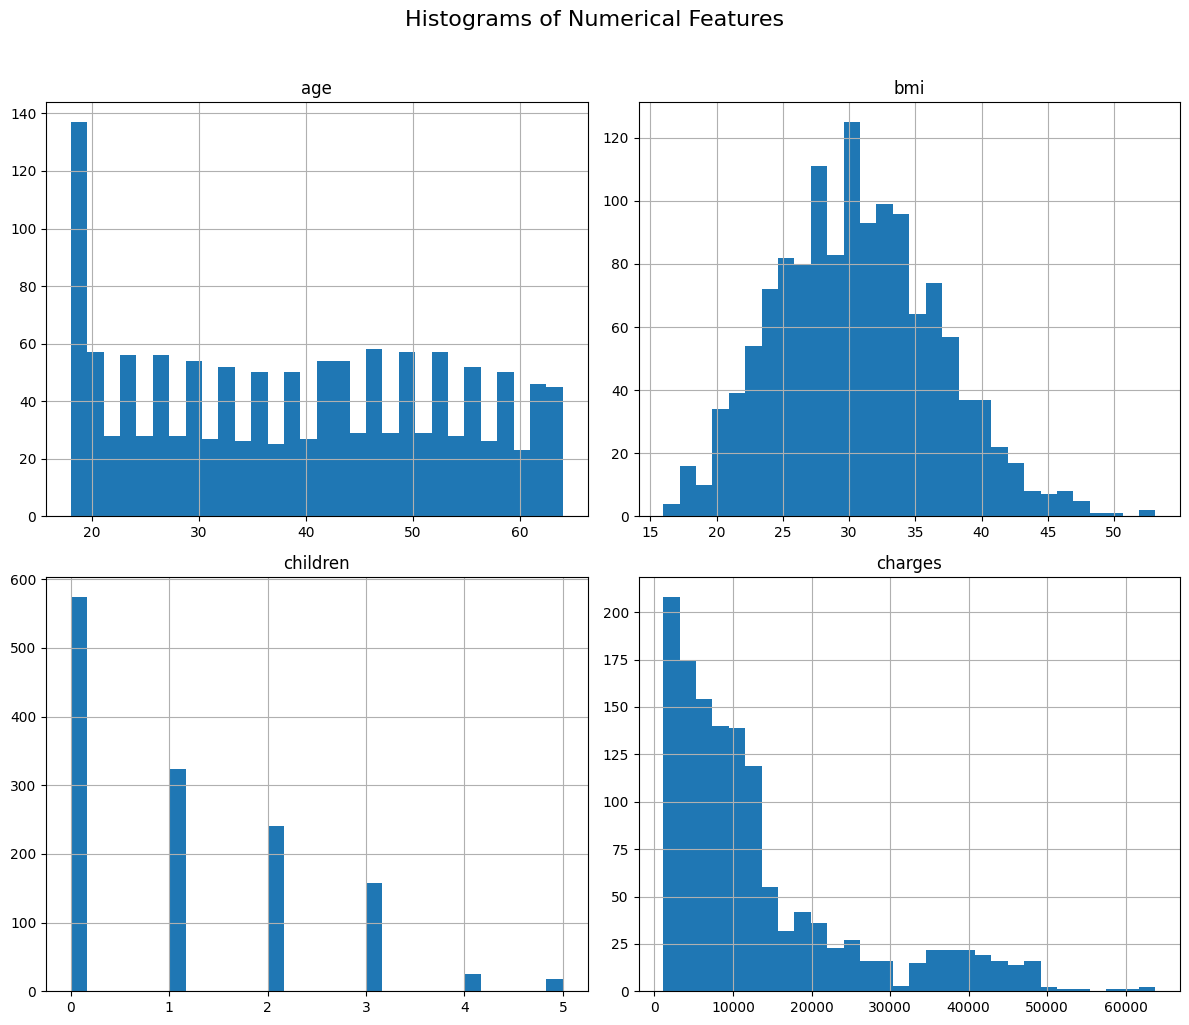


Generating Box Plots for Numerical Features (Outlier Analysis)...
  age: 0 potential outliers detected (using IQR rule)
  bmi: 9 potential outliers detected (using IQR rule)
  children: 0 potential outliers detected (using IQR rule)
  charges: 139 potential outliers detected (using IQR rule)


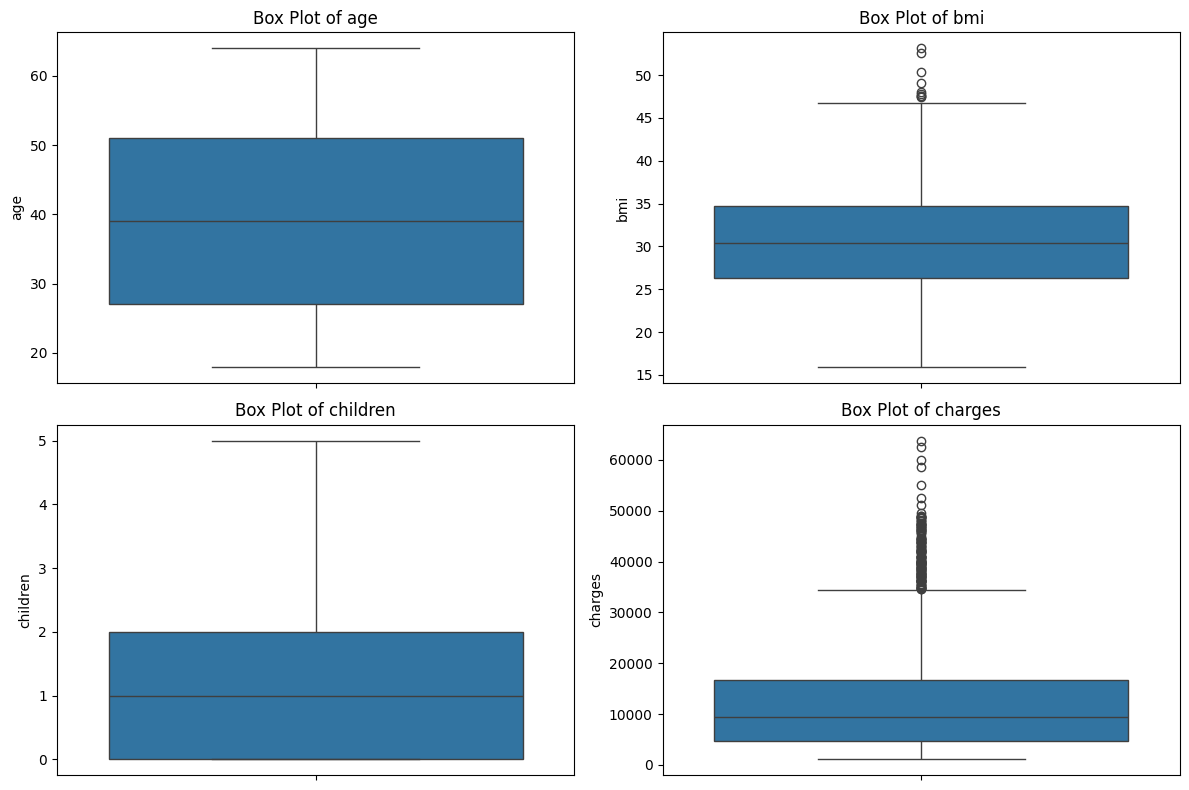


Generating Scatter Plots (Numerical Features vs Charges)...


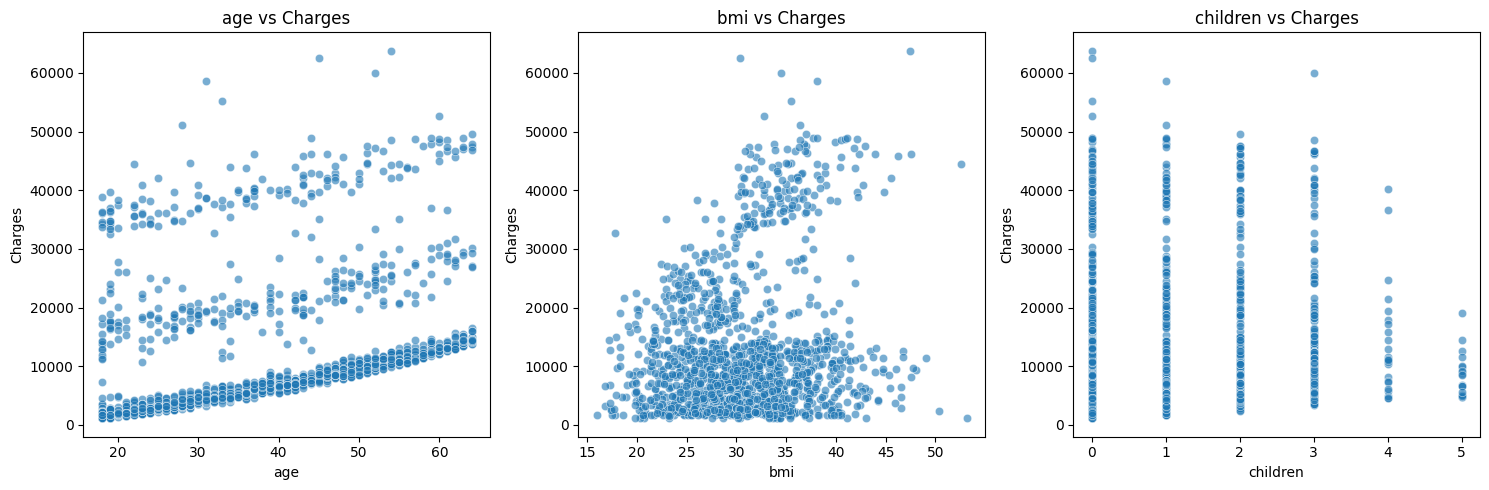


Generating Scatter Plots (Numerical Features vs Charges with Categorical Hue)...


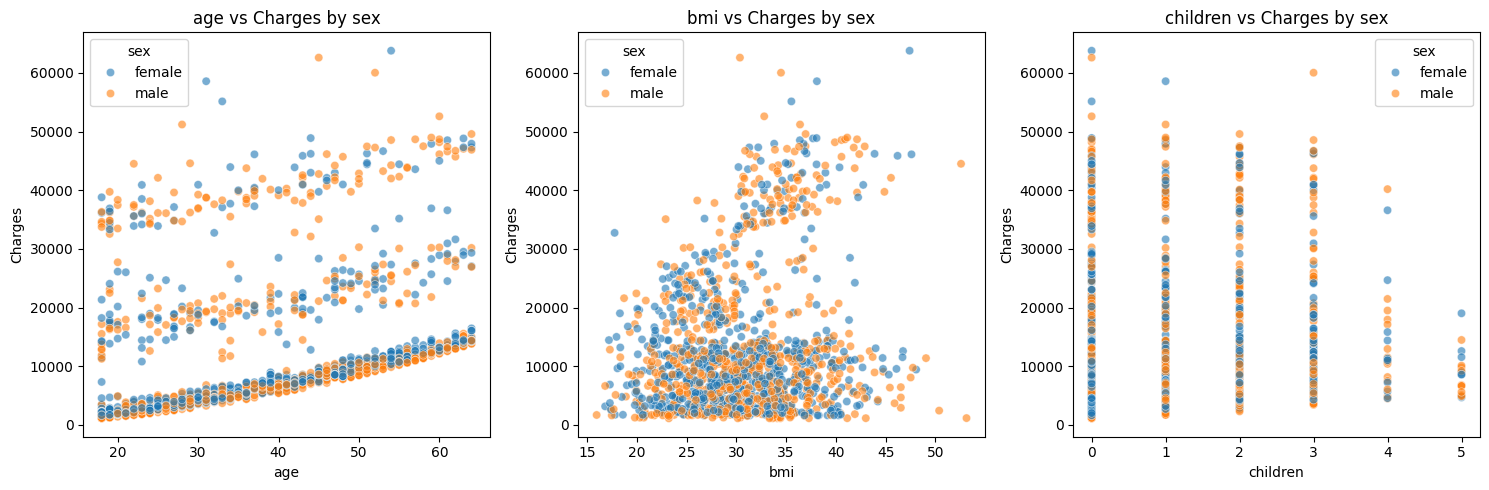

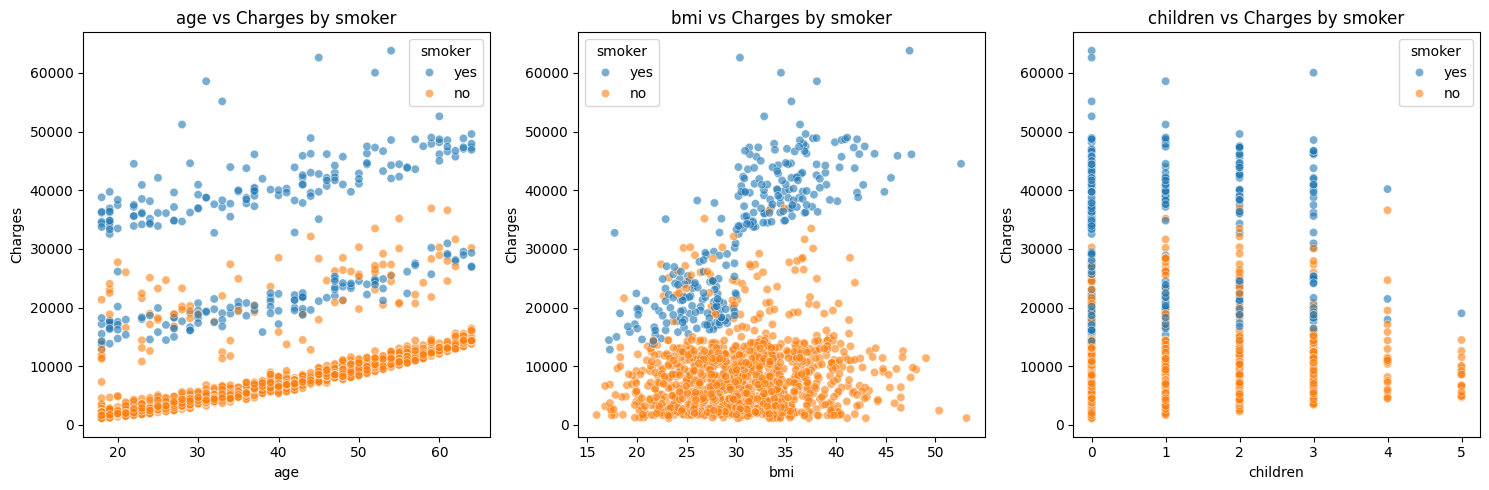

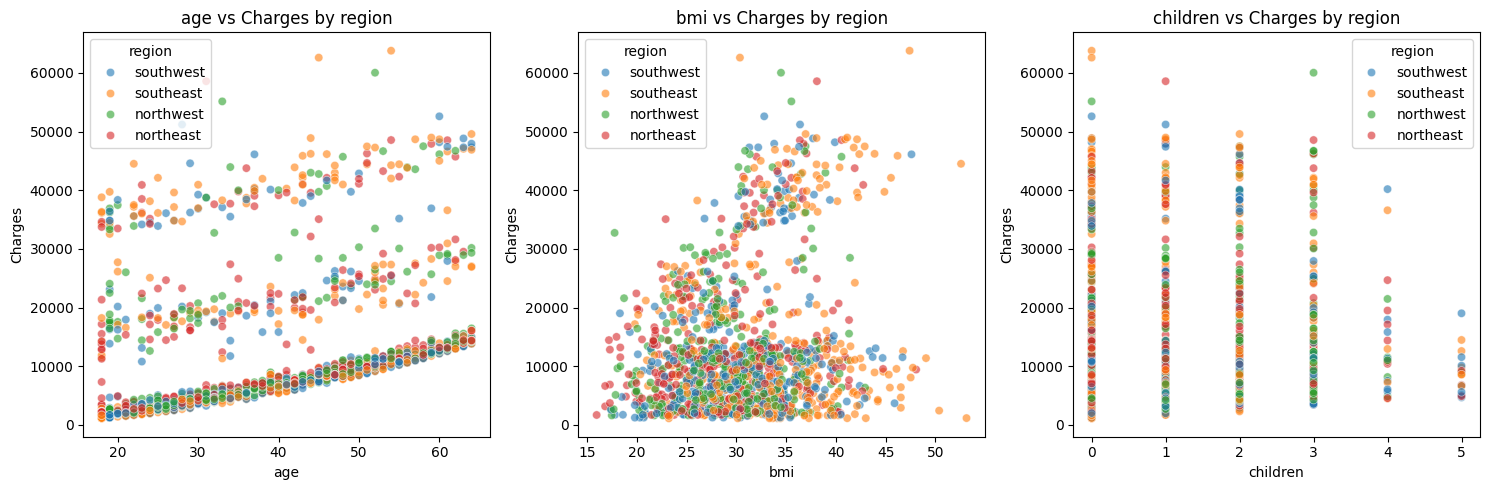


Pearson Correlation Matrix:


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000



Generating Pearson Correlation Heatmap...


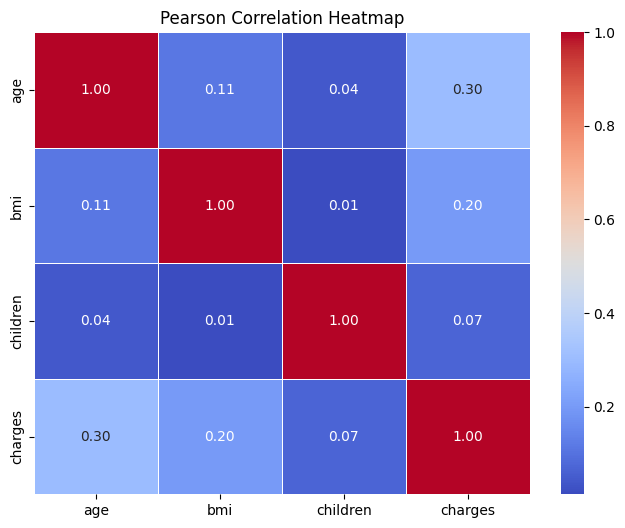


Spearman Correlation Matrix:


,age,bmi,children,charges
age,1.000000,0.107736,0.056992,0.534392
bmi,0.107736,1.000000,0.015607,0.119396
children,0.056992,0.015607,1.000000,0.133339
charges,0.534392,0.119396,0.133339,1.000000



Generating Spearman Correlation Heatmap...


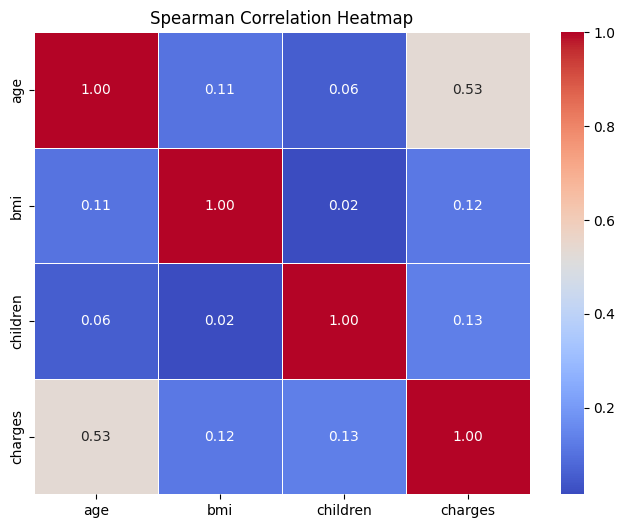

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

numerical_cols = ['age', 'bmi', 'children', 'charges']
categorical_cols = ['sex', 'smoker', 'region']

print("Generating Histograms for Numerical Features...")
df[numerical_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

print("\nGenerating Box Plots for Numerical Features (Outlier Analysis)...")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"  {col}: {outliers} potential outliers detected (using IQR rule)")
plt.tight_layout()
plt.show()

print("\nGenerating Scatter Plots (Numerical Features vs Charges)...")
plt.figure(figsize=(15, 5))
for i, col in enumerate(['age', 'bmi', 'children']):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['charges'], alpha=0.6)
    plt.title(f'{col} vs Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
plt.tight_layout()
plt.show()

print("\nGenerating Scatter Plots (Numerical Features vs Charges with Categorical Hue)...")
for cat_col in categorical_cols:
    plt.figure(figsize=(15, 5))
    for i, num_col in enumerate(['age', 'bmi', 'children']):
        plt.subplot(1, 3, i + 1)
        sns.scatterplot(x=df[num_col], y=df['charges'], hue=df[cat_col], alpha=0.6)
        plt.title(f'{num_col} vs Charges by {cat_col}')
        plt.xlabel(num_col)
        plt.ylabel('Charges')
    plt.tight_layout()
    plt.show()


original_numerical_cols = ['age', 'bmi', 'children', 'charges']

print("\nPearson Correlation Matrix:")
pearson_corr = df[original_numerical_cols].corr(method='pearson')
display(pearson_corr)

print("\nGenerating Pearson Correlation Heatmap...")
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

print("\nSpearman Correlation Matrix:")
spearman_corr = df[original_numerical_cols].corr(method='spearman')
display(spearman_corr)

print("\nGenerating Spearman Correlation Heatmap...")
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()



Perform hypothesis tests to compare groups (Student's t-test, ANOVA for charges vs. smoker, region, etc.).


In [ ]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd
import numpy as np

male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']
ttest_sex = ttest_ind(male_charges, female_charges)
print("--- Independent Samples t-test for Sex vs Charges ---")
print(f"Test Statistic: {ttest_sex.statistic:.4f}")
print(f"P-value: {ttest_sex.pvalue:.4f}")
if ttest_sex.pvalue < 0.05:
    print("Interpretation: Reject the null hypothesis. There is a statistically significant difference in mean charges between males and females.")
else:
    print("Interpretation: Fail to reject the null hypothesis. There is no statistically significant difference in mean charges between males and females.")
print("-" * 30)

smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']
ttest_smoker = ttest_ind(smoker_charges, non_smoker_charges)
print("\n--- Independent Samples t-test for Smoker vs Charges ---")
print(f"Test Statistic: {ttest_smoker.statistic:.4f}")
print(f"P-value: {ttest_smoker.pvalue:.4f}")
if ttest_smoker.pvalue < 0.05:
    print("Interpretation: Reject the null hypothesis. There is a statistically significant difference in mean charges between smokers and non-smokers.")
else:
    print("Interpretation: Fail to reject the null hypothesis. There is no statistically significant difference in mean charges between smokers and non-smokers.")
print("-" * 30)

region_groups = [df[df['region'] == region]['charges'] for region in df['region'].unique()]
anova_region = f_oneway(*region_groups)
print("\n--- One-way ANOVA test for Region vs Charges ---")
print(f"Test Statistic: {anova_region.statistic:.4f}")
print(f"P-value: {anova_region.pvalue:.4f}")
if anova_region.pvalue < 0.05:
    print("Interpretation: Reject the null hypothesis. There is a statistically significant difference in mean charges across different regions.")
else:
    print("Interpretation: Fail to reject the null hypothesis. There is no statistically significant difference in mean charges across different regions.")
print("-" * 30)

print("\n--- Summary of Hypothesis Test Findings ---")
print("Based on the hypothesis tests (significance level = 0.05):")
if ttest_sex.pvalue < 0.05:
    print("- There is a statistically significant difference in mean insurance charges between males and females.")
else:
    print("- There is no statistically significant difference in mean insurance charges between males and females.")
if ttest_smoker.pvalue < 0.05:
    print("- There is a statistically significant difference in mean insurance charges between smokers and non-smokers.")
else:
     print("- There is no statistically significant difference in mean insurance charges between smokers and non-smokers.")
if anova_region.pvalue < 0.05:
    print("- There is a statistically significant difference in mean insurance charges across different regions.")
else:
    print("- There is no statistically significant difference in mean insurance charges across different regions.")

--- Independent Samples t-test for Sex vs Charges ---
Test Statistic: 2.0975
P-value: 0.0361
Interpretation: Reject the null hypothesis. There is a statistically significant difference in mean charges between males and females.
------------------------------

--- Independent Samples t-test for Smoker vs Charges ---
Test Statistic: 46.6649
P-value: 0.0000
Interpretation: Reject the null hypothesis. There is a statistically significant difference in mean charges between smokers and non-smokers.
------------------------------

--- One-way ANOVA test for Region vs Charges ---
Test Statistic: 2.9696
P-value: 0.0309
Interpretation: Reject the null hypothesis. There is a statistically significant difference in mean charges across different regions.
------------------------------

--- Summary of Hypothesis Test Findings ---
Based on the hypothesis tests (significance level = 0.05):
- There is a statistically significant difference in mean insurance charges between males and females.
- There is



Check the homogeneity of variances (Levene's Test).

In [ ]:
from scipy.stats import levene
import pandas as pd

sex_groups = [df[df['sex'] == s]['charges'] for s in df['sex'].unique()]
levene_sex = levene(*sex_groups)
print("--- Levene's Test for Homogeneity of Variances (Charges vs Sex) ---")
print(f"Test Statistic: {levene_sex.statistic:.4f}")
print(f"P-value: {levene_sex.pvalue:.4f}")
if levene_sex.pvalue < 0.05:
    print("Interpretation: Reject the null hypothesis. The variances of charges are not equal across sex groups (heteroscedasticity).")
else:
    print("Interpretation: Fail to reject the null hypothesis. The variances of charges are equal across sex groups (homoscedasticity).")
print("-" * 30)

smoker_groups = [df[df['smoker'] == s]['charges'] for s in df['smoker'].unique()]
levene_smoker = levene(*smoker_groups)
print("\n--- Levene's Test for Homogeneity of Variances (Charges vs Smoker) ---")
print(f"Test Statistic: {levene_smoker.statistic:.4f}")
print(f"P-value: {levene_smoker.pvalue:.4f}")
if levene_smoker.pvalue < 0.05:
    print("Interpretation: Reject the null hypothesis. The variances of charges are not equal across smoker groups (heteroscedasticity).")
else:
    print("Interpretation: Fail to reject the null hypothesis. The variances of charges are equal across smoker groups (homoscedasticity).")
print("-" * 30)

region_groups = [df[df['region'] == r]['charges'] for r in df['region'].unique()]
levene_region = levene(*region_groups)
print("\n--- Levene's Test for Homogeneity of Variances (Charges vs Region) ---")
print(f"Test Statistic: {levene_region.statistic:.4f}")
print(f"P-value: {levene_region.pvalue:.4f}")
if levene_region.pvalue < 0.05:
    print("Interpretation: Reject the null hypothesis. The variances of charges are not equal across region groups (heteroscedasticity).")
else:
    print("Interpretation: Fail to reject the null hypothesis. The variances of charges are equal across region groups (homoscedasticity).")
print("-" * 30)

--- Levene's Test for Homogeneity of Variances (Charges vs Sex) ---
Test Statistic: 9.9093
P-value: 0.0017
Interpretation: Reject the null hypothesis. The variances of charges are not equal across sex groups (heteroscedasticity).
------------------------------

--- Levene's Test for Homogeneity of Variances (Charges vs Smoker) ---
Test Statistic: 332.6135
P-value: 0.0000
Interpretation: Reject the null hypothesis. The variances of charges are not equal across smoker groups (heteroscedasticity).
------------------------------

--- Levene's Test for Homogeneity of Variances (Charges vs Region) ---
Test Statistic: 5.5600
P-value: 0.0009
Interpretation: Reject the null hypothesis. The variances of charges are not equal across region groups (heteroscedasticity).
------------------------------




### Partial correlation analysis.

In [ ]:
# 1. Instale a biblioteca `pingouin` se ainda não estiver instalada no ambiente.
try:
    import pingouin as pg
except ImportError:
    !pip install pingouin
    import pingouin as pg


# Select the original numerical columns for partial correlation analysis
numerical_cols_for_pcorr = ['age', 'bmi', 'children', 'charges']

# 3. Calcule a matriz de correlação parcial
print("--- Partial Correlation Matrix ---")
pcorr_matrix = pg.pcorr(df[numerical_cols_for_pcorr])

# 4. Exiba a matriz de correlação parcial calculada.
display(pcorr_matrix)

# 5. Interprete brevemente os resultados
print("\n--- Interpretation of Partial Correlation ---")
print("Partial correlation measures the correlation between two variables while controlling for the effect of other variables.")
print("Comparing this to Pearson or Spearman correlations, differences highlight the direct relationship between two variables after removing the influence of the others.")
print("For example, if the partial correlation between 'age' and 'charges' is lower than the Pearson correlation, it suggests that some of the observed correlation in Pearson was due to the influence of 'bmi' and 'children'.")
print("Conversely, if the partial correlation is similar to the Pearson correlation, it suggests a more direct relationship.")
print("Observe the values above and compare them to the Pearson/Spearman heatmaps shown previously to see how controlling for other variables changes the perceived relationships.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00
--- Partial Correlation Matrix ---


,age,bmi,children,charges
age,1.000000,0.053455,0.023325,0.282773
bmi,0.053455,1.000000,-0.001990,0.174482
children,0.023325,-0.001990,1.000000,0.057461
charges,0.282773,0.174482,0.057461,1.000000



--- Interpretation of Partial Correlation ---
Partial correlation measures the correlation between two variables while controlling for the effect of other variables.
Comparing this to Pearson or Spearman correlations, differences highlight the direct relationship between two variables after removing the influence of the others.
For example, if the partial correlation between 'age' and 'charges' is lower than the Pearson correlation, it suggests that some of the observed correlation in Pearson was due to the influence of 'bmi' and 'children'.
Conversely, if the partial correlation is similar to the Pearson correlation, it suggests a more direct relationship.
Observe the values above and compare them to the Pearson/Spearman heatmaps shown previously to see how controlling for other variables changes the perceived relationships.



#### Identify and analyze null values (isnull().sum()) and outliers (using box plots and possibly statistical methods).


In [ ]:
import pandas as pd
import numpy as np

print("Number of missing values per column:")
display(df.isnull().sum())


numerical_cols_with_outliers = ['bmi', 'charges']

print("\nOutlier counts (using IQR method):")
for col in numerical_cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"  {col}: {outliers_count} outliers")


Number of missing values per column:


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
charges_log,0
charges_boxcox,0
charges_yeojohnson,0



Outlier counts (using IQR method):
  bmi: 9 outliers
  charges: 139 outliers


## Advanced Preprocessing

Encode categorical variables (sex, smoker, region) using One-Hot Encoding (pd.get_dummies, drop_first=True) and explore Advanced Encoding such as Target Encoding (using category_encoders).


In [ ]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import category_encoders as ce

df_onehot = df.copy()
df_target_encoded = df.copy()

categorical_cols = ['sex', 'smoker', 'region']
target = 'charges'

df_onehot = pd.get_dummies(df_onehot, columns=categorical_cols, drop_first=True)


encoder = ce.TargetEncoder(cols=categorical_cols)
df_target_encoded[categorical_cols] = encoder.fit_transform(df_target_encoded[categorical_cols], df_target_encoded[target])


print("DataFrame with One-Hot Encoding (drop_first=True):")
display(df_onehot.head())
print("\nInfo for DataFrame with One-Hot Encoding:")
df_onehot.info()

print("\nDataFrame with Target Encoding:")
display(df_target_encoded.head())
print("\nInfo for DataFrame with Target Encoding:")
df_target_encoded.info()

DataFrame with One-Hot Encoding (drop_first=True):


,age,bmi,children,charges,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,9.734236,12.128980,12.121120,3.363842,7.887106,7.763290,False,True,False,False,True
1,18,33.770,1,1725.55230,7.453882,8.808597,8.805045,3.548755,8.811784,8.618976,True,False,False,True,False
2,28,33.000,3,4449.46200,8.400763,10.147521,10.142156,3.526361,8.695722,8.511575,True,False,False,True,False
3,33,22.705,0,21984.47061,9.998137,12.534951,12.526567,3.165686,6.976455,6.920914,True,False,True,False,False
4,32,28.880,0,3866.85520,8.260455,9.945637,9.940530,3.397189,8.048320,7.912470,True,False,True,False,False



Info for DataFrame with One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1338 non-null   int64  
 1   bmi                 1338 non-null   float64
 2   children            1338 non-null   int64  
 3   charges             1338 non-null   float64
 4   charges_log         1338 non-null   float64
 5   charges_boxcox      1338 non-null   float64
 6   charges_yeojohnson  1338 non-null   float64
 7   bmi_log             1338 non-null   float64
 8   bmi_boxcox          1338 non-null   float64
 9   bmi_yeojohnson      1338 non-null   float64
 10  sex_male            1338 non-null   bool   
 11  smoker_yes          1338 non-null   bool   
 12  region_northwest    1338 non-null   bool   
 13  region_southeast    1338 non-null   bool   
 14  region_southwest    1338 non-null   bool   
dtypes: bool(5), 

,age,sex,bmi,children,smoker,region,charges,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson
0,19,12569.578844,27.900,0,32050.231831,12346.937377,16884.92400,9.734236,12.128980,12.121120,3.363842,7.887106,7.763290
1,18,13956.751178,33.770,1,8434.268298,14735.411438,1725.55230,7.453882,8.808597,8.805045,3.548755,8.811784,8.618976
2,28,13956.751178,33.000,3,8434.268298,14735.411438,4449.46200,8.400763,10.147521,10.142156,3.526361,8.695722,8.511575
3,33,13956.751178,22.705,0,8434.268298,12417.575374,21984.47061,9.998137,12.534951,12.526567,3.165686,6.976455,6.920914
4,32,13956.751178,28.880,0,8434.268298,12417.575374,3866.85520,8.260455,9.945637,9.940530,3.397189,8.048320,7.912470



Info for DataFrame with Target Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1338 non-null   int64  
 1   sex                 1338 non-null   float64
 2   bmi                 1338 non-null   float64
 3   children            1338 non-null   int64  
 4   smoker              1338 non-null   float64
 5   region              1338 non-null   float64
 6   charges             1338 non-null   float64
 7   charges_log         1338 non-null   float64
 8   charges_boxcox      1338 non-null   float64
 9   charges_yeojohnson  1338 non-null   float64
 10  bmi_log             1338 non-null   float64
 11  bmi_boxcox          1338 non-null   float64
 12  bmi_yeojohnson      1338 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 136.0 KB



Scale numerical variables (age, bmi, children) using StandardScaler or MinMaxScaler based on the distribution analysis (fit on training, transform training/testing separately).


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

numerical_cols_to_scale = ['age', 'bmi', 'children']
target_col = 'charges'


df_scaled = df_onehot.copy()

X = df_scaled.drop(target_col, axis=1)
y = df_scaled[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train_numerical = X_train[numerical_cols_to_scale]
scaler.fit(X_train_numerical)

X_train_scaled_numerical = scaler.transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols_to_scale])


X_train[numerical_cols_to_scale] = X_train_scaled_numerical
X_test[numerical_cols_to_scale] = X_test_scaled_numerical


print("Descriptive statistics of scaled numerical columns in Training set:")
display(X_train[numerical_cols_to_scale].describe())

print("\nDescriptive statistics of scaled numerical columns in Testing set:")
display(X_test[numerical_cols_to_scale].describe())

Descriptive statistics of scaled numerical columns in Training set:


,age,bmi,children
count,1.070000e+03,1.070000e+03,1.070000e+03
mean,-1.992176e-16,-4.648410e-17,-2.324205e-17
std,1.000468e+00,1.000468e+00,1.000468e+00
min,-1.518194e+00,-2.417060e+00,-9.111921e-01
25%,-8.784157e-01,-7.210253e-01,-9.111921e-01
50%,1.016470e-02,-5.800739e-02,-8.842793e-02
75%,8.276587e-01,6.515707e-01,7.343363e-01
max,1.751782e+00,3.736342e+00,3.202629e+00



Descriptive statistics of scaled numerical columns in Testing set:


,age,bmi,children
count,268.000000,268.000000,268.000000
mean,-0.053230,0.085129,-0.051588
std,0.992638,1.044117,0.957308
min,-1.518194,-2.275517,-0.911192
25%,-0.949502,-0.643839,-0.911192
50%,-0.096465,0.036355,-0.088428
75%,0.756572,0.768075,0.734336
max,1.751782,3.645291,3.202629


Calculate VIF (Variance Inflation Factor) to check for multicollinearity among the numerical features after scaling.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np


X_train_vif = X_train.copy()

for col in X_train_vif.columns:
    if X_train_vif[col].dtype == 'bool':
        X_train_vif[col] = X_train_vif[col].astype(int)


X_train_vif['intercept'] = 1

vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i)
                   for i in range(X_train_vif.shape[1])]


vif_data = vif_data[vif_data['feature'] != 'intercept'].sort_values(by='VIF', ascending=False)

print("Variance Inflation Factor (VIF) for features in the training set:")
display(vif_data)

print("\nAnalysis of VIF values:")
print("VIF values indicate the degree of multicollinearity among features.")
print("A VIF of 1 means no correlation with other features.")
print("VIF between 1 and 5 suggests moderate correlation.")
print("VIF above 5 or 10 indicates high multicollinearity, which might be problematic for some models (e.g., Linear Regression).")
print("Observe the values above and identify features with high multicollinearity.")

Variance Inflation Factor (VIF) for features in the training set:


,feature,VIF
7,bmi_boxcox,2.297018e+09
8,bmi_yeojohnson,1.953066e+09
4,charges_boxcox,1.866195e+09
5,charges_yeojohnson,1.864488e+09
6,bmi_log,4.551127e+06
1,bmi,2.636994e+06
3,charges_log,3.592507e+03
10,smoker_yes,3.674185e+00
0,age,2.313570e+00
12,region_southeast,1.650156e+00



Analysis of VIF values:
VIF values indicate the degree of multicollinearity among features.
A VIF of 1 means no correlation with other features.
VIF between 1 and 5 suggests moderate correlation.
VIF above 5 or 10 indicates high multicollinearity, which might be problematic for some models (e.g., Linear Regression).
Observe the values above and identify features with high multicollinearity.


## Feature Engineering

Create derived features: categorization of BMI/age ranges using pd.cut.


In [ ]:
import pandas as pd

df_featured = df.copy()

age_bins = [18, 30, 40, 50, 64]
age_labels = ['18-30', '31-40', '41-50', '51-64']

df_featured['age_group'] = pd.cut(df_featured['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)


bmi_bins = [df_featured['bmi'].min(), 18.5, 25, 30, df_featured['bmi'].max()]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obesity']

df_featured['bmi_group'] = pd.cut(df_featured['bmi'], bins=bmi_bins, labels=bmi_labels, right=True, include_lowest=True)


print("DataFrame with new categorical features (age_group, bmi_group):")
display(df_featured.head())

print("\nValue counts for 'age_group':")
display(df_featured['age_group'].value_counts())

print("\nValue counts for 'bmi_group':")
display(df_featured['bmi_group'].value_counts())

DataFrame with new categorical features (age_group, bmi_group):


,age,sex,bmi,children,smoker,region,charges,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,12.128980,12.121120,3.363842,7.887106,7.763290,18-30,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,8.808597,8.805045,3.548755,8.811784,8.618976,18-30,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,10.147521,10.142156,3.526361,8.695722,8.511575,18-30,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,12.534951,12.526567,3.165686,6.976455,6.920914,31-40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,9.945637,9.940530,3.397189,8.048320,7.912470,31-40,Overweight



Value counts for 'age_group':


,count
age_group,
18-30,444
51-64,356
41-50,281
31-40,257



Value counts for 'bmi_group':


,count
bmi_group,
Obesity,705
Overweight,386
Normal,226
Underweight,21



Create combined risk features.

In [ ]:
import pandas as pd


df_risk = df_onehot.copy()


weight_age = 0.2
weight_bmi = 0.3
weight_smoker = 0.5


if 'smoker_yes' in df_risk.columns and df_risk['smoker_yes'].dtype == 'bool':
    df_risk['smoker_yes'] = df_risk['smoker_yes'].astype(int)

from sklearn.preprocessing import MinMaxScaler

scaler_risk = MinMaxScaler()
df_risk[['age', 'bmi']] = scaler_risk.fit_transform(df_risk[['age', 'bmi']])


df_risk['risk_score'] = (df_risk['age'] * weight_age +
                         df_risk['bmi'] * weight_bmi +
                         df_risk['smoker_yes'] * weight_smoker)

print("DataFrame with 'risk_score' feature:")
display(df_risk.head())

print("\nDescriptive statistics for 'risk_score':")
display(df_risk['risk_score'].describe())

DataFrame with 'risk_score' feature:


,age,bmi,children,charges,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,risk_score
0,0.021739,0.321227,0,16884.92400,9.734236,12.128980,12.121120,3.363842,7.887106,7.763290,False,1,False,False,True,0.600716
1,0.000000,0.479150,1,1725.55230,7.453882,8.808597,8.805045,3.548755,8.811784,8.618976,True,0,False,True,False,0.143745
2,0.217391,0.458434,3,4449.46200,8.400763,10.147521,10.142156,3.526361,8.695722,8.511575,True,0,False,True,False,0.181009
3,0.326087,0.181464,0,21984.47061,9.998137,12.534951,12.526567,3.165686,6.976455,6.920914,True,0,True,False,False,0.119656
4,0.304348,0.347592,0,3866.85520,8.260455,9.945637,9.940530,3.397189,8.048320,7.912470,True,0,True,False,False,0.165147



Descriptive statistics for 'risk_score':


,risk_score
count,1338.000000
mean,0.313268
std,0.216820
min,0.000000
25%,0.167266
50%,0.240006
75%,0.346470
max,0.910355



Generate interaction features between relevant variables (e.g., age * smoker).


In [ ]:
import pandas as pd


X_train_interaction = X_train.copy()
X_test_interaction = X_test.copy()



interaction_features_train = pd.DataFrame(index=X_train_interaction.index)
interaction_features_test = pd.DataFrame(index=X_test_interaction.index)


interaction_features_train['age_smoker'] = X_train_interaction['age'] * X_train_interaction['smoker_yes']
interaction_features_test['age_smoker'] = X_test_interaction['age'] * X_test_interaction['smoker_yes']

interaction_features_train['bmi_smoker'] = X_train_interaction['bmi'] * X_train_interaction['smoker_yes']
interaction_features_test['bmi_smoker'] = X_test_interaction['bmi'] * X_test_interaction['smoker_yes']

interaction_features_train['children_smoker'] = X_train_interaction['children'] * X_train_interaction['smoker_yes']
interaction_features_test['children_smoker'] = X_test_interaction['children'] * X_test_interaction['smoker_yes']

interaction_features_train['age_bmi'] = X_train_interaction['age'] * X_train_interaction['bmi']
interaction_features_test['age_bmi'] = X_test_interaction['age'] * X_test_interaction['bmi']


if X_train_interaction['sex_male'].dtype == 'bool':
     X_train_interaction['sex_male'] = X_train_interaction['sex_male'].astype(int)
if X_test_interaction['sex_male'].dtype == 'bool':
     X_test_interaction['sex_male'] = X_test_interaction['sex_male'].astype(int)

interaction_features_train['age_sex'] = X_train_interaction['age'] * X_train_interaction['sex_male']
interaction_features_test['age_sex'] = X_test_interaction['age'] * X_test_interaction['sex_male']

interaction_features_train['bmi_sex'] = X_train_interaction['bmi'] * X_train_interaction['sex_male']
interaction_features_test['bmi_sex'] = X_test_interaction['bmi'] * X_test_interaction['sex_male']


X_train_interaction = pd.concat([X_train_interaction, interaction_features_train], axis=1)
X_test_interaction = pd.concat([X_test_interaction, interaction_features_test], axis=1)


print("First 5 rows of X_train with interaction features:")
display(X_train_interaction.head())

print("\nFirst 5 rows of X_test with interaction features:")
display(X_test_interaction.head())


print("\nDescriptive statistics for interaction features in X_train:")
display(X_train_interaction[interaction_features_train.columns].describe())

print("\nDescriptive statistics for interaction features in X_test:")
display(X_test_interaction[interaction_features_test.columns].describe())

X_train = X_train_interaction
X_test = X_test_interaction

First 5 rows of X_train with interaction features:


,age,bmi,children,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker,children_smoker,age_bmi,age_sex,bmi_sex
560,0.472227,-1.756525,0.734336,9.126398,11.211492,11.204791,3.042139,6.447353,6.431936,0,False,True,False,False,0.0,-0.0,0.0,-0.829478,0.0,-0.0
1285,0.543313,-1.033082,-0.911192,9.052009,11.100867,11.094305,3.231595,7.270600,7.192928,0,False,False,False,False,0.0,-0.0,-0.0,-0.561287,0.0,-0.0
1142,0.898745,-0.943687,-0.911192,10.207990,12.861127,12.852316,3.252697,7.366589,7.281715,0,False,False,True,False,0.0,-0.0,-0.0,-0.848134,0.0,-0.0
969,-0.025379,0.622393,3.202629,9.059265,11.111641,11.105066,3.564449,8.893814,8.694882,0,False,False,True,False,-0.0,0.0,0.0,-0.015795,-0.0,0.0
486,1.040918,-1.504893,1.557100,9.431590,11.669121,11.661846,3.112181,6.743818,6.705861,0,False,True,False,False,0.0,-0.0,0.0,-1.566470,0.0,-0.0



First 5 rows of X_test with interaction features:


,age,bmi,children,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_smoker,bmi_smoker,children_smoker,age_bmi,age_sex,bmi_sex
764,0.401140,-0.891539,0.734336,9.115598,11.195408,11.188728,3.264805,7.422064,7.333031,0,False,False,False,False,0.000000,-0.000000,0.000000,-0.357632,0.000000,-0.000000
887,-0.238638,-0.089461,-0.911192,8.570388,10.393237,10.387562,3.434632,8.232185,8.082617,0,False,True,False,False,-0.000000,-0.000000,-0.000000,0.021349,-0.000000,-0.000000
890,1.751782,-0.608453,-0.911192,10.286434,12.983822,12.974848,3.328089,7.716880,7.605783,0,True,True,False,False,1.751782,-0.608453,-0.911192,-1.065877,0.000000,-0.000000
1293,0.472227,-0.797177,1.557100,9.138081,11.228899,11.222176,3.286348,7.521504,7.425022,1,False,True,False,False,0.000000,-0.000000,0.000000,-0.376448,0.472227,-0.797177
259,-1.447107,0.225079,-0.911192,10.426774,13.204379,13.195112,3.494080,8.530443,8.358628,1,True,True,False,False,-1.447107,0.225079,-0.911192,-0.325713,-1.447107,0.225079



Descriptive statistics for interaction features in X_train:


,age_smoker,bmi_smoker,children_smoker,age_bmi,age_sex,bmi_sex
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,-0.021030,-0.001394,0.005656,0.118274,-0.004228,0.007644
std,0.452808,0.466359,0.435007,1.005712,0.715312,0.725609
min,-1.518194,-2.212609,-0.911192,-5.672491,-1.518194,-2.417060
25%,0.000000,0.000000,0.000000,-0.372056,-0.025379,-0.059663
50%,0.000000,0.000000,0.000000,0.038203,-0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.567869,0.045708,0.000000
max,1.751782,2.820864,3.202629,4.058704,1.751782,3.736342



Descriptive statistics for interaction features in X_test:


,age_smoker,bmi_smoker,children_smoker,age_bmi,age_sex,bmi_sex
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.022737,0.030625,-0.017818,0.076536,-0.061988,0.129300
std,0.426729,0.497665,0.410605,1.029957,0.686908,0.705351
min,-1.447107,-2.118246,-0.911192,-4.497735,-1.518194,-2.165428
25%,0.000000,-0.000000,-0.000000,-0.400044,-0.096465,0.000000
50%,0.000000,0.000000,-0.000000,0.037145,-0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.614448,0.000000,0.191349
max,1.751782,3.645291,2.379865,3.133606,1.751782,3.645291


Create selective polynomial features for terms that show nonlinear relationships in the scatter plots.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

numerical_features_original = ['age', 'bmi', 'children']

X_train_poly = X_train.copy()
X_test_poly = X_test.copy()


poly = PolynomialFeatures(degree=2, include_bias=False)


X_train_numerical_original = X_train_poly[numerical_features_original]
poly.fit(X_train_numerical_original)

X_train_poly_transformed = poly.transform(X_train_numerical_original)
X_test_poly_transformed = poly.transform(X_test_poly[numerical_features_original])


poly_feature_names = poly.get_feature_names_out(numerical_features_original)

X_train_poly_df = pd.DataFrame(X_train_poly_transformed, columns=poly_feature_names, index=X_train_poly.index)
X_test_poly_df = pd.DataFrame(X_test_poly_transformed, columns=poly_feature_names, index=X_test_poly.index)

original_feature_poly_names = numerical_features_original


poly_only_feature_names = [name for name in poly_feature_names if name not in original_feature_poly_names]

X_train_poly_df = X_train_poly_df[poly_only_feature_names]
X_test_poly_df = X_test_poly_df[poly_only_feature_names]



X_train_poly = pd.concat([X_train_poly, X_train_poly_df], axis=1)
X_test_poly = pd.concat([X_test_poly, X_test_poly_df], axis=1)

print("First 5 rows of X_train with polynomial features:")
display(X_train_poly.head())

print("\nFirst 5 rows of X_test with polynomial features:")
display(X_test_poly.head())

print("\nInfo for X_train with polynomial features:")
X_train_poly.info()

print("\nInfo for X_test with polynomial features:")
X_test_poly.info()

X_train = X_train_poly
X_test = X_test_poly

First 5 rows of X_train with polynomial features:


,age,bmi,children,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_male,...,children_smoker,age_bmi,age_sex,bmi_sex,age^2,age bmi,age children,bmi^2,bmi children,children^2
560,0.472227,-1.756525,0.734336,9.126398,11.211492,11.204791,3.042139,6.447353,6.431936,0,...,0.0,-0.829478,0.0,-0.0,0.222998,-0.829478,0.346773,3.085381,-1.289880,0.539250
1285,0.543313,-1.033082,-0.911192,9.052009,11.100867,11.094305,3.231595,7.270600,7.192928,0,...,-0.0,-0.561287,0.0,-0.0,0.295189,-0.561287,-0.495062,1.067259,0.941337,0.830271
1142,0.898745,-0.943687,-0.911192,10.207990,12.861127,12.852316,3.252697,7.366589,7.281715,0,...,-0.0,-0.848134,0.0,-0.0,0.807743,-0.848134,-0.818929,0.890545,0.859880,0.830271
969,-0.025379,0.622393,3.202629,9.059265,11.111641,11.105066,3.564449,8.893814,8.694882,0,...,0.0,-0.015795,-0.0,0.0,0.000644,-0.015795,-0.081278,0.387373,1.993294,10.256831
486,1.040918,-1.504893,1.557100,9.431590,11.669121,11.661846,3.112181,6.743818,6.705861,0,...,0.0,-1.566470,0.0,-0.0,1.083510,-1.566470,1.620814,2.264703,-2.343269,2.424562



First 5 rows of X_test with polynomial features:


,age,bmi,children,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_male,...,children_smoker,age_bmi,age_sex,bmi_sex,age^2,age bmi,age children,bmi^2,bmi children,children^2
764,0.401140,-0.891539,0.734336,9.115598,11.195408,11.188728,3.264805,7.422064,7.333031,0,...,0.000000,-0.357632,0.000000,-0.000000,0.160913,-0.357632,0.294572,0.794842,-0.654690,0.539250
887,-0.238638,-0.089461,-0.911192,8.570388,10.393237,10.387562,3.434632,8.232185,8.082617,0,...,-0.000000,0.021349,-0.000000,-0.000000,0.056948,0.021349,0.217445,0.008003,0.081517,0.830271
890,1.751782,-0.608453,-0.911192,10.286434,12.983822,12.974848,3.328089,7.716880,7.605783,0,...,-0.911192,-1.065877,0.000000,-0.000000,3.068741,-1.065877,-1.596210,0.370215,0.554418,0.830271
1293,0.472227,-0.797177,1.557100,9.138081,11.228899,11.222176,3.286348,7.521504,7.425022,1,...,0.000000,-0.376448,0.472227,-0.797177,0.222998,-0.376448,0.735304,0.635491,-1.241285,2.424562
259,-1.447107,0.225079,-0.911192,10.426774,13.204379,13.195112,3.494080,8.530443,8.358628,1,...,-0.911192,-0.325713,-1.447107,0.225079,2.094119,-0.325713,1.318593,0.050661,-0.205090,0.830271



Info for X_train with polynomial features:
<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1070 non-null   float64
 1   bmi                 1070 non-null   float64
 2   children            1070 non-null   float64
 3   charges_log         1070 non-null   float64
 4   charges_boxcox      1070 non-null   float64
 5   charges_yeojohnson  1070 non-null   float64
 6   bmi_log             1070 non-null   float64
 7   bmi_boxcox          1070 non-null   float64
 8   bmi_yeojohnson      1070 non-null   float64
 9   sex_male            1070 non-null   int64  
 10  smoker_yes          1070 non-null   bool   
 11  region_northwest    1070 non-null   bool   
 12  region_southeast    1070 non-null   bool   
 13  region_southwest    1070 non-null   bool   
 14  age_smoker          1070 non-null   float64
 15  bmi_smoker    

In [ ]:
%pip install category_encoders --quantile_test


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quantile_test



Explore Frequency Encoding for categorical variables.

In [ ]:
import pandas as pd

df_freq_encoded = df.copy()

categorical_cols = ['sex', 'smoker', 'region']

print("Applying Frequency Encoding to categorical columns:")
for col in categorical_cols:
    freq = df_freq_encoded[col].value_counts(normalize=True)
    df_freq_encoded[f'{col}_freq'] = df_freq_encoded[col].map(freq)
    print(f"- Applied Frequency Encoding to '{col}'")

print("\nDataFrame with Frequency Encoded features:")
display(df_freq_encoded.head())

print("\nInfo for DataFrame with Frequency Encoded features:")
df_freq_encoded.info()

Applying Frequency Encoding to categorical columns:
- Applied Frequency Encoding to 'sex'
- Applied Frequency Encoding to 'smoker'
- Applied Frequency Encoding to 'region'

DataFrame with Frequency Encoded features:


,age,sex,bmi,children,smoker,region,charges,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_freq,smoker_freq,region_freq
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,12.128980,12.121120,3.363842,7.887106,7.763290,0.494768,0.204783,0.242900
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,8.808597,8.805045,3.548755,8.811784,8.618976,0.505232,0.795217,0.272048
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,10.147521,10.142156,3.526361,8.695722,8.511575,0.505232,0.795217,0.272048
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,12.534951,12.526567,3.165686,6.976455,6.920914,0.505232,0.795217,0.242900
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,9.945637,9.940530,3.397189,8.048320,7.912470,0.505232,0.795217,0.242900



Info for DataFrame with Frequency Encoded features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1338 non-null   int64  
 1   sex                 1338 non-null   object 
 2   bmi                 1338 non-null   float64
 3   children            1338 non-null   int64  
 4   smoker              1338 non-null   object 
 5   region              1338 non-null   object 
 6   charges             1338 non-null   float64
 7   charges_log         1338 non-null   float64
 8   charges_boxcox      1338 non-null   float64
 9   charges_yeojohnson  1338 non-null   float64
 10  bmi_log             1338 non-null   float64
 11  bmi_boxcox          1338 non-null   float64
 12  bmi_yeojohnson      1338 non-null   float64
 13  sex_freq            1338 non-null   float64
 14  smoker_freq         1338 non-null   float64
 15  re


Generate Statistics-Based Features (groupby, transform 'mean'/'std').

In [ ]:
import pandas as pd


df_stat_features = df.copy()

categorical_cols_for_stats = ['region', 'smoker', 'sex']

print("Generating statistical features:")
for col in categorical_cols_for_stats:
    mean_charges_by_group = df_stat_features.groupby(col)['charges'].transform('mean')
    df_stat_features[f'{col}_charges_mean'] = mean_charges_by_group
    print(f"- Created '{col}_charges_mean'")

    std_charges_by_group = df_stat_features.groupby(col)['charges'].transform('std')
    df_stat_features[f'{col}_charges_std'] = std_charges_by_group
    print(f"- Created '{col}_charges_std'")

print("\nDataFrame with new statistical features:")
display(df_stat_features.head())

print("\nInfo for DataFrame with new statistical features:")
df_stat_features.info()

Generating statistical features:
- Created 'region_charges_mean'
- Created 'region_charges_std'
- Created 'smoker_charges_mean'
- Created 'smoker_charges_std'
- Created 'sex_charges_mean'
- Created 'sex_charges_std'

DataFrame with new statistical features:


,age,sex,bmi,children,smoker,region,charges,charges_log,charges_boxcox,charges_yeojohnson,bmi_log,bmi_boxcox,bmi_yeojohnson,region_charges_mean,region_charges_std,smoker_charges_mean,smoker_charges_std,sex_charges_mean,sex_charges_std
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,12.128980,12.121120,3.363842,7.887106,7.763290,12346.937377,11557.179101,32050.231832,11541.547176,12569.578844,11128.703801
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,8.808597,8.805045,3.548755,8.811784,8.618976,14735.411438,13971.098589,8434.268298,5993.781819,13956.751178,12971.025915
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,10.147521,10.142156,3.526361,8.695722,8.511575,14735.411438,13971.098589,8434.268298,5993.781819,13956.751178,12971.025915
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,12.534951,12.526567,3.165686,6.976455,6.920914,12417.575374,11072.276928,8434.268298,5993.781819,13956.751178,12971.025915
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,9.945637,9.940530,3.397189,8.048320,7.912470,12417.575374,11072.276928,8434.268298,5993.781819,13956.751178,12971.025915



Info for DataFrame with new statistical features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1338 non-null   int64  
 1   sex                  1338 non-null   object 
 2   bmi                  1338 non-null   float64
 3   children             1338 non-null   int64  
 4   smoker               1338 non-null   object 
 5   region               1338 non-null   object 
 6   charges              1338 non-null   float64
 7   charges_log          1338 non-null   float64
 8   charges_boxcox       1338 non-null   float64
 9   charges_yeojohnson   1338 non-null   float64
 10  bmi_log              1338 non-null   float64
 11  bmi_boxcox           1338 non-null   float64
 12  bmi_yeojohnson       1338 non-null   float64
 13  region_charges_mean  1338 non-null   float64
 14  region_charges_std   1338 non-null   

## Feature Selection

Apply Statistical Methods: SelectKBest with f_regression (for linear relationships) and mutual_info_regression (for nonlinear relationships) to select the K best features.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
import pandas as pd
import numpy as np


X_train_select = X_train.copy()
for col in X_train_select.columns:
    if X_train_select[col].dtype == 'bool':
        X_train_select[col] = X_train_select[col].astype(int)

X_train_select = X_train_select.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
print(f"Shape of X_train before SelectKBest: {X_train.shape}")
print(f"Shape of X_train after handling inf/NaN and bool: {X_train_select.shape}")


print("\n--- Feature Selection using SelectKBest with f_regression ---")

k_features_freg = X_train_select.shape[1] // 2
print(f"Selecting top {k_features_freg} features using f_regression...")

select_freg = SelectKBest(score_func=f_regression, k=k_features_freg)
select_freg.fit(X_train_select, y_train)

selected_features_freg_mask = select_freg.get_support()
selected_features_freg = X_train_select.columns[selected_features_freg_mask]
scores_freg = select_freg.scores_[selected_features_freg_mask]

freg_results = pd.DataFrame({'Feature': selected_features_freg, 'Score (f_regression)': scores_freg}).sort_values(by='Score (f_regression)', ascending=False)
print("Selected Features and Scores (f_regression):")
display(freg_results)


print("\n--- Feature Selection using SelectKBest with mutual_info_regression ---")

k_features_mi = X_train_select.shape[1] // 2
print(f"Selecting top {k_features_mi} features using mutual_info_regression...")

select_mi = SelectKBest(score_func=mutual_info_regression, k=k_features_mi)
select_mi.fit(X_train_select, y_train)

selected_features_mi_mask = select_mi.get_support()
selected_features_mi = X_train_select.columns[selected_features_mi_mask]
scores_mi = select_mi.scores_[selected_features_mi_mask]

mi_results = pd.DataFrame({'Feature': selected_features_mi, 'Score (mutual_info_regression)': scores_mi}).sort_values(by='Score (mutual_info_regression)', ascending=False)
print("Selected Features and Scores (mutual_info_regression):")
display(mi_results)

Shape of X_train before SelectKBest: (1070, 26)
Shape of X_train after handling inf/NaN and bool: (1070, 26)

--- Feature Selection using SelectKBest with f_regression ---
Selecting top 13 features using f_regression...
Selected Features and Scores (f_regression):


,Feature,Score (f_regression)
4,charges_yeojohnson,4637.486980
3,charges_boxcox,4637.451695
2,charges_log,4140.431728
8,smoker_yes,1659.952101
10,bmi_smoker,147.494755
0,age,92.070905
11,age_sex,48.606820
5,bmi_log,44.849086
7,bmi_yeojohnson,44.406068
6,bmi_boxcox,44.401597



--- Feature Selection using SelectKBest with mutual_info_regression ---
Selecting top 13 features using mutual_info_regression...
Selected Features and Scores (mutual_info_regression):


,Feature,Score (mutual_info_regression)
3,charges_yeojohnson,5.130873
2,charges_boxcox,5.130788
1,charges_log,5.108262
0,age,1.398229
10,age^2,1.219467
12,age children,1.218297
9,age_sex,0.795472
5,age_smoker,0.474916
6,bmi_smoker,0.457633
7,children_smoker,0.371408


Use Model-Based Methods: SelectFromModel with a tree model (e.g., ExtraTreesRegressor) to select features based on importance.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
import numpy as np


X_train_select_model = X_train.copy()
for col in X_train_select_model.columns:
    if X_train_select_model[col].dtype == 'bool':
        X_train_select_model[col] = X_train_select_model[col].astype(int)

X_train_select_model = X_train_select_model.replace([np.inf, -np.inf], np.nan).dropna(axis=1)


print("--- Feature Selection using SelectFromModel with ExtraTreesRegressor ---")

model_for_selection = ExtraTreesRegressor(n_estimators=100, random_state=42)

model_for_selection.fit(X_train_select_model, y_train)


print(f"Selecting features with importance greater than the mean importance...")
sfm = SelectFromModel(model_for_selection, threshold='mean', prefit=True)

selected_features_model_mask = sfm.get_support()

selected_features_model = X_train_select_model.columns[selected_features_model_mask]

print("\nSelected Features using SelectFromModel:")
display(selected_features_model)

feature_importances = pd.Series(model_for_selection.feature_importances_, index=X_train_select_model.columns)
print("\nFeature Importances from ExtraTreesRegressor:")
display(feature_importances.sort_values(ascending=False))

--- Feature Selection using SelectFromModel with ExtraTreesRegressor ---
Selecting features with importance greater than the mean importance...

Selected Features using SelectFromModel:


Index(['charges_log', 'charges_boxcox', 'charges_yeojohnson', 'smoker_yes'], dtype='object')


Feature Importances from ExtraTreesRegressor:


,0
charges_yeojohnson,0.272104
charges_log,0.251862
charges_boxcox,0.229703
smoker_yes,0.222109
age,0.006227
bmi_log,0.006062
bmi,0.003188
bmi_smoker,0.002971
bmi_boxcox,0.002466
age^2,0.001323



Implement Recursive Feature Elimination (RFE) with a linear model (e.g., LinearRegression) to refine the selection.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np


X_train_select_rfe = X_train.copy()
for col in X_train_select_rfe.columns:
    if X_train_select_rfe[col].dtype == 'bool':
        X_train_select_rfe[col] = X_train_select_rfe[col].astype(int)

X_train_select_rfe = X_train_select_rfe.replace([np.inf, -np.inf], np.nan).dropna(axis=1)


print("--- Feature Selection using Recursive Feature Elimination (RFE) ---")
estimator = LinearRegression()


n_features_to_select = 10
print(f"Selecting top {n_features_to_select} features using RFE...")

rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select)

rfe.fit(X_train_select_rfe, y_train)

selected_features_rfe_mask = rfe.get_support()
selected_features_rfe = X_train_select_rfe.columns[selected_features_rfe_mask]

print("\nSelected Features using RFE:")
display(selected_features_rfe)

feature_ranking = pd.Series(rfe.ranking_, index=X_train_select_rfe.columns)
print("\nFeature Ranking from RFE:")
display(feature_ranking.sort_values())

--- Feature Selection using Recursive Feature Elimination (RFE) ---
Selecting top 10 features using RFE...

Selected Features using RFE:


Index(['bmi', 'charges_log', 'charges_boxcox', 'charges_yeojohnson', 'bmi_log',
       'bmi_boxcox', 'bmi_yeojohnson', 'smoker_yes', 'bmi_smoker', 'bmi^2'],
      dtype='object')


Feature Ranking from RFE:


,0
bmi,1
charges_log,1
charges_yeojohnson,1
charges_boxcox,1
bmi_log,1
bmi_boxcox,1
smoker_yes,1
bmi_yeojohnson,1
bmi_smoker,1
bmi^2,1


## Building and Evaluating Advanced Models

Split the data (with the selected features) into training and testing sets (train_test_split).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


selected_features_final = [col for col in X_train.columns if 'charges_' not in col]

X_train_selected = X_train[selected_features_final]
X_test_selected = X_test[selected_features_final]

print("Shape of X_train with selected features:", X_train_selected.shape)
print("Shape of X_test with selected features:", X_test_selected.shape)

print("\nFirst 5 rows of X_train with selected features:")
display(X_train_selected.head())

print("\nFirst 5 rows of X_test with selected features:")
display(X_test_selected.head())

Shape of X_train with selected features: (1070, 23)
Shape of X_test with selected features: (268, 23)

First 5 rows of X_train with selected features:


,age,bmi,children,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_male,smoker_yes,region_northwest,region_southeast,...,children_smoker,age_bmi,age_sex,bmi_sex,age^2,age bmi,age children,bmi^2,bmi children,children^2
560,0.472227,-1.756525,0.734336,3.042139,6.447353,6.431936,0,False,True,False,...,0.0,-0.829478,0.0,-0.0,0.222998,-0.829478,0.346773,3.085381,-1.289880,0.539250
1285,0.543313,-1.033082,-0.911192,3.231595,7.270600,7.192928,0,False,False,False,...,-0.0,-0.561287,0.0,-0.0,0.295189,-0.561287,-0.495062,1.067259,0.941337,0.830271
1142,0.898745,-0.943687,-0.911192,3.252697,7.366589,7.281715,0,False,False,True,...,-0.0,-0.848134,0.0,-0.0,0.807743,-0.848134,-0.818929,0.890545,0.859880,0.830271
969,-0.025379,0.622393,3.202629,3.564449,8.893814,8.694882,0,False,False,True,...,0.0,-0.015795,-0.0,0.0,0.000644,-0.015795,-0.081278,0.387373,1.993294,10.256831
486,1.040918,-1.504893,1.557100,3.112181,6.743818,6.705861,0,False,True,False,...,0.0,-1.566470,0.0,-0.0,1.083510,-1.566470,1.620814,2.264703,-2.343269,2.424562



First 5 rows of X_test with selected features:


,age,bmi,children,bmi_log,bmi_boxcox,bmi_yeojohnson,sex_male,smoker_yes,region_northwest,region_southeast,...,children_smoker,age_bmi,age_sex,bmi_sex,age^2,age bmi,age children,bmi^2,bmi children,children^2
764,0.401140,-0.891539,0.734336,3.264805,7.422064,7.333031,0,False,False,False,...,0.000000,-0.357632,0.000000,-0.000000,0.160913,-0.357632,0.294572,0.794842,-0.654690,0.539250
887,-0.238638,-0.089461,-0.911192,3.434632,8.232185,8.082617,0,False,True,False,...,-0.000000,0.021349,-0.000000,-0.000000,0.056948,0.021349,0.217445,0.008003,0.081517,0.830271
890,1.751782,-0.608453,-0.911192,3.328089,7.716880,7.605783,0,True,True,False,...,-0.911192,-1.065877,0.000000,-0.000000,3.068741,-1.065877,-1.596210,0.370215,0.554418,0.830271
1293,0.472227,-0.797177,1.557100,3.286348,7.521504,7.425022,1,False,True,False,...,0.000000,-0.376448,0.472227,-0.797177,0.222998,-0.376448,0.735304,0.635491,-1.241285,2.424562
259,-1.447107,0.225079,-0.911192,3.494080,8.530443,8.358628,1,True,True,False,...,-0.911192,-0.325713,-1.447107,0.225079,2.094119,-0.325713,1.318593,0.050661,-0.205090,0.830271


# Task
Analyze the dataset "insurance.csv" by performing the following steps:
```
A. Exploratory Data Analysis (EDA): This includes data inspection, descriptive statistics, visualizations (such as histograms, box plots, scatter plots, and correlation heatmaps), identification of null values and outliers, and advanced statistics (ANOVA, ANCOVA).

B. Preprocessing: This involves handling null values, encoding categorical features (using One-Hot Encoding, Target Encoding, and Frequency Encoding), scaling numerical features (with StandardScaler and MinMaxScaler), and creating new features through feature engineering (derived features, interaction features, selective polynomial features, and statistics-based features).

C. Model Building and Evaluation: This includes splitting the data into training and testing sets, feature selection (using statistical and model-based methods, and Recursive Feature Elimination), training and evaluating various regression models (like Linear, Polynomial, Decision Tree, Random Forest, Gradient Boosting, Ensemble Methods, Regularized Models, XGBoost, and LightGBM) using cross-validation (StratifiedKFold with qcut) and metrics (R², adjusted R², MAE, MSE, RMSE, MAPE, SMAPE), and optimizing models through Grid Search and Random Search.

D. Analysis and Interpretation: This involves identifying feature importance, analyzing errors (using predicted vs. actual plots, residual plots with Durbin-Watson, Breusch-Pagan tests, Q-Q plots, and Cook's Distance), performing statistical validation (F-test, t-test, Wald test), and calculating confidence and prediction intervals.

The analysis will utilize libraries such as pandas, category_encoders, sklearn (for feature selection, ensemble methods, linear models, and model selection), xgboost, lightgbm, scipy, statsmodels, optuna, and shap. Techniques and tests will include Normality Tests (Shapiro-Wilk, Kolmogorov-Smirnov), Transformations (Box-Cox, log, Yeo-Johnson), Hypothesis Tests (t-test, ANOVA, Levene's Test, Mann-Whitney U), Correlation Analysis (Pearson, Spearman, Partial Correlation), VIF, and Bootstrap.
```

## Prepare for Modeling

Define the regression models to be trained (Linear, Regularized (ElasticNet, Ridge, Lasso), Tree (Decision Tree, Random Forest), Ensemble (Voting, Bagging), XGBoost, LightGBM), define the evaluation metrics to be used (R², adjusted R², MAE, MSE, RMSE, MAPE, SMAPE), and set up Stratified Cross-Validation (StratifiedKFold).


**Reasoning**:
Import necessary libraries and modules, define the models, evaluation metrics, and set up stratified cross-validation for the next steps of model training and evaluation.



In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(random_state=42),
    'Voting Regressor': VotingRegressor(estimators=[]),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'LightGBM Regressor': LGBMRegressor(random_state=42)
}

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100


n_bins = 10
try:
    y_train_stratified = pd.qcut(y_train, q=n_bins, labels=False, duplicates='drop')
except Exception as e:
    print(f"Could not create {n_bins} stratified bins for y_train. Trying fewer bins.")
    for fewer_bins in range(n_bins - 1, 1, -1):
        try:
            y_train_stratified = pd.qcut(y_train, q=fewer_bins, labels=False, duplicates='drop')
            print(f"Successfully created {fewer_bins} stratified bins.")
            break
        except Exception as e_inner:
            print(f"Failed to create {fewer_bins} stratified bins: {e_inner}")
            if fewer_bins == 2:
                 print("Could not create stratified bins with at least 2 bins. StratifiedKFold might not work.")

                 y_train_stratified = None

if y_train_stratified is not None:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    print("\nStratifiedKFold instantiated successfully.")
else:
    print("\nStratification failed. StratifiedKFold will not be used.")
    skf = None


StratifiedKFold instantiated successfully.


In [ ]:
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


cv_results = {}

scoring = {
    'r2': 'r2',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_mean_squared_error': 'neg_mean_squared_error'
}

X_train_model = X_train_selected.copy()
for col in X_train_model.columns:
    if X_train_model[col].dtype == 'bool':
        X_train_model[col] = X_train_model[col].astype(int)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("KFold instantiated successfully for regression cross-validation.")


print("--- Performing KFold Cross-Validation for Models ---")
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")

    if name == 'Voting Regressor':
        print("Skipping Voting Regressor in initial CV.")
        continue

    try:
        scores = cross_validate(model, X_train_model, y_train, cv=kf, scoring=scoring, n_jobs=-1)

        cv_results[name] = {
            'Mean R²': scores['test_r2'].mean(),
            'Mean MAE': -scores['test_neg_mean_absolute_error'].mean(),
            'Mean MSE': -scores['test_neg_mean_squared_error'].mean(),
            'Mean RMSE': np.sqrt(-scores['test_neg_mean_squared_error'].mean())
        }
        print(f"{name} - Mean CV R²: {cv_results[name]['Mean R²']:.4f}")
        print(f"{name} - Mean CV MAE: {cv_results[name]['Mean MAE']:.2f}")
        print(f"{name} - Mean CV MSE: {cv_results[name]['Mean MSE']:.2f}")
        print(f"{name} - Mean CV RMSE: {cv_results[name]['Mean RMSE']:.2f}")

    except Exception as e:
        print(f"Error during cross-validation for {name}: {e}")
        cv_results[name] = {'Error': str(e)}


print("\n--- Cross-Validation Results ---")
cv_results_df = pd.DataFrame(cv_results).T
if not cv_results_df.empty and 'Mean R²' in cv_results_df.columns:
    display(cv_results_df.sort_values(by='Mean R²', ascending=False))
else:
    print("No successful cross-validation results to display.")
    display(cv_results_df) #

KFold instantiated successfully for regression cross-validation.
--- Performing KFold Cross-Validation for Models ---

Training and evaluating Linear Regression...
Linear Regression - Mean CV R²: 0.8378
Linear Regression - Mean CV MAE: 2934.52
Linear Regression - Mean CV MSE: 23548678.84
Linear Regression - Mean CV RMSE: 4852.70

Training and evaluating Ridge...
Ridge - Mean CV R²: 0.8352
Ridge - Mean CV MAE: 2991.18
Ridge - Mean CV MSE: 23906884.08
Ridge - Mean CV RMSE: 4889.47

Training and evaluating Lasso...
Lasso - Mean CV R²: 0.8354
Lasso - Mean CV MAE: 2967.80
Lasso - Mean CV MSE: 23871895.67
Lasso - Mean CV RMSE: 4885.89

Training and evaluating ElasticNet...
ElasticNet - Mean CV R²: 0.4089
ElasticNet - Mean CV MAE: 7279.90
ElasticNet - Mean CV MSE: 85031964.95
ElasticNet - Mean CV RMSE: 9221.28

Training and evaluating Decision Tree Regressor...
Decision Tree Regressor - Mean CV R²: 0.6951
Decision Tree Regressor - Mean CV MAE: 3209.70
Decision Tree Regressor - Mean CV MSE: 43

,Mean R²,Mean MAE,Mean MSE,Mean RMSE,Error
Linear Regression,0.837766,2934.519751,23548678.844829,4852.698099,NaN
Lasso,0.835419,2967.795015,23871895.674774,4885.887399,NaN
Ridge,0.835158,2991.182072,23906884.082924,4889.466646,NaN
Random Forest Regressor,0.82529,2829.28144,25334634.526947,5033.352216,NaN
Bagging Regressor,0.808488,2972.003452,27693024.053555,5262.41618,NaN
XGBoost Regressor,0.798604,3190.347072,29172791.71079,5401.184288,NaN
Decision Tree Regressor,0.695112,3209.696675,43736436.117227,6613.352865,NaN
ElasticNet,0.408921,7279.899923,85031964.948277,9221.277837,NaN
LightGBM Regressor,NaN,NaN,NaN,NaN,\nAll the 5 fits failed.\nIt is very likely th...


In [ ]:
import pandas as pd

print("Columns in X_train_selected:")
display(X_train_selected.columns)

print("\nChecking for duplicate column names:")
duplicate_columns = X_train_selected.columns[X_train_selected.columns.duplicated()]
if len(duplicate_columns) > 0:
    print(f"Duplicate columns found: {list(duplicate_columns)}")
else:
    print("No duplicate column names found.")


print("\nChecking for 'age_bmi' and 'age bmi' related columns:")
age_bmi_cols = [col for col in X_train_selected.columns if 'age_bmi' in col or 'age bmi' in col]
print(f"Columns related to age_bmi: {age_bmi_cols}")


if 'age bmi' in X_train_selected.columns and 'age_bmi' in X_train_selected.columns:
    print("\n'age bmi' and 'age_bmi' both exist. Removing 'age bmi' (from PolynomialFeatures).")
    X_train_selected = X_train_selected.drop('age bmi', axis=1)
    X_test_selected = X_test_selected.drop('age bmi', axis=1)
    print("Removed 'age bmi' column.")

print("\nColumns in X_train_selected after removal:")
display(X_train_selected.columns)

print("\nShape of X_train with corrected features:", X_train_selected.shape)
print("Shape of X_test with corrected features:", X_test_selected.shape)


Columns in X_train_selected:


Index(['age', 'bmi', 'children', 'bmi_log', 'bmi_boxcox', 'bmi_yeojohnson',
       'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_smoker', 'bmi_smoker', 'children_smoker',
       'age_bmi', 'age_sex', 'bmi_sex', 'age^2', 'age bmi', 'age children',
       'bmi^2', 'bmi children', 'children^2'],
      dtype='object')


Checking for duplicate column names:
No duplicate column names found.

Checking for 'age_bmi' and 'age bmi' related columns:
Columns related to age_bmi: ['age_bmi', 'age bmi']

'age bmi' and 'age_bmi' both exist. Removing 'age bmi' (from PolynomialFeatures).
Removed 'age bmi' column.

Columns in X_train_selected after removal:


Index(['age', 'bmi', 'children', 'bmi_log', 'bmi_boxcox', 'bmi_yeojohnson',
       'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_smoker', 'bmi_smoker', 'children_smoker',
       'age_bmi', 'age_sex', 'bmi_sex', 'age^2', 'age children', 'bmi^2',
       'bmi children', 'children^2'],
      dtype='object')


Shape of X_train with corrected features: (1070, 22)
Shape of X_test with corrected features: (268, 22)


In [ ]:
X_train_model = X_train_selected.copy()
for col in X_train_model.columns:
    if X_train_model[col].dtype == 'bool':
        X_train_model[col] = X_train_model[col].astype(int)

lgbm_model = LGBMRegressor(random_state=42)

print("\n--- Retrying Cross-Validation for LightGBM Regressor ---")

try:
    scores = cross_validate(lgbm_model, X_train_model, y_train, cv=kf, scoring=scoring, n_jobs=-1)

    cv_results['LightGBM Regressor'] = {
        'Mean R²': scores['test_r2'].mean(),
        'Mean MAE': -scores['test_neg_mean_absolute_error'].mean(),
        'Mean MSE': -scores['test_neg_mean_squared_error'].mean(),
        'Mean RMSE': np.sqrt(-scores['test_neg_mean_squared_error'].mean())
    }
    print(f"LightGBM Regressor - Mean CV R²: {cv_results['LightGBM Regressor']['Mean R²']:.4f}")
    print(f"LightGBM Regressor - Mean CV MAE: {cv_results['LightGBM Regressor']['Mean MAE']:.2f}")
    print(f"LightGBM Regressor - Mean CV MSE: {cv_results['LightGBM Regressor']['Mean MSE']:.2f}")
    print(f"LightGBM Regressor - Mean CV RMSE: {cv_results['LightGBM Regressor']['Mean RMSE']:.2f}")
    if 'Error' in cv_results['LightGBM Regressor']:
        del cv_results['LightGBM Regressor']['Error']


except Exception as e:
    print(f"Error during cross-validation for LightGBM Regressor: {e}")
    cv_results['LightGBM Regressor'] = {'Error': str(e)}


print("\n--- Updated Cross-Validation Results ---")
cv_results_df = pd.DataFrame(cv_results).T
if not cv_results_df.empty and 'Mean R²' in cv_results_df.columns:
    display(cv_results_df.sort_values(by='Mean R²', ascending=False))
else:
    print("No successful cross-validation results to display.")
    display(cv_results_df)



--- Retrying Cross-Validation for LightGBM Regressor ---
LightGBM Regressor - Mean CV R²: 0.8123
LightGBM Regressor - Mean CV MAE: 3101.71
LightGBM Regressor - Mean CV MSE: 27188800.39
LightGBM Regressor - Mean CV RMSE: 5214.29

--- Updated Cross-Validation Results ---


,Mean R²,Mean MAE,Mean MSE,Mean RMSE
Linear Regression,0.837766,2934.519751,2.354868e+07,4852.698099
Lasso,0.835419,2967.795015,2.387190e+07,4885.887399
Ridge,0.835158,2991.182072,2.390688e+07,4889.466646
Random Forest Regressor,0.825290,2829.281440,2.533463e+07,5033.352216
LightGBM Regressor,0.812298,3101.714969,2.718880e+07,5214.288100
Bagging Regressor,0.808488,2972.003452,2.769302e+07,5262.416180
XGBoost Regressor,0.798604,3190.347072,2.917279e+07,5401.184288
Decision Tree Regressor,0.695112,3209.696675,4.373644e+07,6613.352865
ElasticNet,0.408921,7279.899923,8.503196e+07,9221.277837


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

models_to_optimize = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42),
    'LightGBM Regressor': LGBMRegressor(random_state=42)
}

param_grids = {
    'Linear Regression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.001, 0.01, 0.1, 1.0]},
    'Random Forest Regressor': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting Regressor': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'XGBoost Regressor': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    'LightGBM Regressor': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'num_leaves': [31, 62]}
}

optimized_models = {}
best_scores = {}

X_train_grid = X_train_selected.copy()
for col in X_train_grid.columns:
    if X_train_grid[col].dtype == 'bool':
        X_train_grid[col] = X_train_grid[col].astype(int)


print("--- Performing Hyperparameter Optimization using GridSearchCV ---")

for name, model in models_to_optimize.items():
    print(f"\nOptimizing {name}...")
    param_grid = param_grids[name]


    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='r2', cv=kf, n_jobs=-1, verbose=1)

    try:
        grid_search.fit(X_train_grid, y_train)

        # Store the best model and its best score
        optimized_models[name] = grid_search.best_estimator_
        best_scores[name] = grid_search.best_score_

        print(f"Optimization complete for {name}.")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")

    except Exception as e:
        print(f"Error during GridSearchCV for {name}: {e}")
        best_scores[name] = {'Error': str(e)}

print("\n--- Best Cross-Validation Scores after Optimization ---")
best_scores_df = pd.DataFrame.from_dict(best_scores, orient='index', columns=['Best CV R²'])
if not best_scores_df.empty and 'Best CV R²' in best_scores_df.columns:
     display(best_scores_df.sort_values(by='Best CV R²', ascending=False))
else:
    print("No successful optimization results to display.")
    display(best_scores_df)


--- Performing Hyperparameter Optimization using GridSearchCV ---

Optimizing Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Optimization complete for Linear Regression.
Best parameters: {}
Best cross-validation R²: 0.8378

Optimizing Ridge...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Optimization complete for Ridge.
Best parameters: {'alpha': 0.1}
Best cross-validation R²: 0.8359

Optimizing Lasso...
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


Optimization complete for Lasso.
Best parameters: {'alpha': 0.001}
Best cross-validation R²: 0.8358

Optimizing Random Forest Regressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimization complete for Random Forest Regressor.
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation R²: 0.8362

Optimizing Gradient Boosting Regressor...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimization complete for Gradient Boosting Regressor.
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best cross-validation R²: 0.8508

Optimizing XGBoost Regressor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Optimization complete for XGBoost Regressor.
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation R²: 0.8473

Optimizing LightGBM Regressor...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Warning] 

,Best CV R²
Gradient Boosting Regressor,0.850785
XGBoost Regressor,0.847280
Linear Regression,0.837766
Random Forest Regressor,0.836178
Ridge,0.835927
Lasso,0.835827
LightGBM Regressor,0.823518


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / np.maximum(denominator, 1e-8)) * 100


def adjusted_r2_score(r2, n_samples, n_features):
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)


test_results = {}

X_test_eval = X_test_selected.copy()
for col in X_test_eval.columns:
    if X_test_eval[col].dtype == 'bool':
        X_test_eval[col] = X_test_eval[col].astype(int)

n_features = X_test_eval.shape[1]
n_samples = X_test_eval.shape[0]

print("--- Evaluating Optimized Models on the Test Set ---")

for name, model in optimized_models.items():
    print(f"\nEvaluating {name} on the test set...")

    try:
        y_pred = model.predict(X_test_eval)

        r2 = r2_score(y_test, y_pred)
        adj_r2 = adjusted_r2_score(r2, n_samples, n_features)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse_val = rmse(y_test, y_pred)
        mape_val = mape(y_test, y_pred)
        smape_val = smape(y_test, y_pred)

        test_results[name] = {
            'R²': r2,
            'Adjusted R²': adj_r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse_val,
            'MAPE': mape_val,
            'SMAPE': smape_val
        }

        print(f"{name} - Test R²: {test_results[name]['R²']:.4f}")
        print(f"{name} - Test Adjusted R²: {test_results[name]['Adjusted R²']:.4f}")
        print(f"{name} - Test MAE: {test_results[name]['MAE']:.2f}")
        print(f"{name} - Test MSE: {test_results[name]['MSE']:.2f}")
        print(f"{name} - Test RMSE: {test_results[name]['RMSE']:.2f}")
        print(f"{name} - Test MAPE: {test_results[name]['MAPE']:.2f}%")
        print(f"{name} - Test SMAPE: {test_results[name]['SMAPE']:.2f}%")


    except Exception as e:
        print(f"Error during test set evaluation for {name}: {e}")
        test_results[name] = {'Error': str(e)}

print("\n--- Test Set Evaluation Results (Optimized Models) ---")
test_results_df = pd.DataFrame(test_results).T
if not test_results_df.empty and 'R²' in test_results_df.columns:
    display(test_results_df.sort_values(by='R²', ascending=False))
else:
    print("No successful test set evaluation results to display.")
    display(test_results_df)

--- Evaluating Optimized Models on the Test Set ---

Evaluating Linear Regression on the test set...
Linear Regression - Test R²: 0.8692
Linear Regression - Test Adjusted R²: 0.8575
Linear Regression - Test MAE: 2743.06
Linear Regression - Test MSE: 20305768.90
Linear Regression - Test RMSE: 4506.19
Linear Regression - Test MAPE: 32.02%
Linear Regression - Test SMAPE: 28.42%

Evaluating Ridge on the test set...
Ridge - Test R²: 0.8714
Ridge - Test Adjusted R²: 0.8598
Ridge - Test MAE: 2743.62
Ridge - Test MSE: 19970596.12
Ridge - Test RMSE: 4468.85
Ridge - Test MAPE: 31.94%
Ridge - Test SMAPE: 28.42%

Evaluating Lasso on the test set...
Lasso - Test R²: 0.8709
Lasso - Test Adjusted R²: 0.8594
Lasso - Test MAE: 2737.19
Lasso - Test MSE: 20035178.97
Lasso - Test RMSE: 4476.07
Lasso - Test MAPE: 31.70%
Lasso - Test SMAPE: 28.25%

Evaluating Random Forest Regressor on the test set...
Random Forest Regressor - Test R²: 0.8591
Random Forest Regressor - Test Adjusted R²: 0.8465
Random Forest 

,R²,Adjusted R²,MAE,MSE,RMSE,MAPE,SMAPE
XGBoost Regressor,0.878681,0.867787,2462.064646,1.883457e+07,4339.881540,30.652395,26.786189
Gradient Boosting Regressor,0.872060,0.860572,2668.739219,1.986248e+07,4456.734359,40.830251,32.103566
Ridge,0.871364,0.859813,2743.618677,1.997060e+07,4468.847292,31.941220,28.415612
Lasso,0.870948,0.859360,2737.193392,2.003518e+07,4476.067356,31.698447,28.246378
Linear Regression,0.869205,0.857460,2743.061751,2.030577e+07,4506.192284,32.019393,28.416238
LightGBM Regressor,0.859481,0.846863,3098.917822,2.181542e+07,4670.697687,48.009664,35.490974
Random Forest Regressor,0.859146,0.846498,2728.115534,2.186733e+07,4676.251414,36.448647,28.389477


### Evaluating Optimized Models on the Test Set

This section presents a detailed evaluation of several optimized regression models using a test dataset. Each model has been trained and tuned previously, and is now assessed based on various statistical metrics to compare their performance in predicting continuous target values.

---

#### What Is Being Evaluated?

Each model is evaluated on the **test set**, which contains unseen data. The evaluation is based on the following regression performance metrics:

- **R² (R-squared)**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. The closer to 1, the better.
- **Adjusted R²**: A version of R² adjusted for the number of predictors. Helps to penalize models with unnecessary complexity.
- **MAE (Mean Absolute Error)**: Measures the average magnitude of the errors in a set of predictions, without considering their direction.
- **MSE (Mean Squared Error)**: The average of the squares of the errors. Penalizes larger errors more than MAE.
- **RMSE (Root Mean Squared Error)**: The square root of MSE. Has the same units as the target variable.
- **MAPE (Mean Absolute Percentage Error)**: Measures the average percentage error between the predicted and actual values.
- **SMAPE (Symmetric Mean Absolute Percentage Error)**: A normalized version of MAPE that accounts for scale in both actual and predicted values.

---

#### Model-by-Model Results Summary

Here’s a summary of how each model performed:

- **Linear Regression** achieved a decent R² of **0.8692**, with a moderate MAE of **2743.06**.
- **Ridge Regression** slightly improved on Linear Regression with an R² of **0.8714**, indicating better generalization.
- **Lasso Regression** provided similar results to Ridge, but with marginally lower MAE and slightly higher RMSE.
- **Random Forest Regressor** had a competitive MAE of **2728.12**, but slightly lower R² (**0.8591**) and higher MAPE (**36.45%**).
- **Gradient Boosting Regressor** yielded stronger predictive power with R² **0.8721**, and an MAE of **2668.74**, although its MAPE was the highest among the top performers.
- **XGBoost Regressor** outperformed all other models with an R² of **0.8787**, lowest MAE of **2462.06**, and lowest SMAPE of **26.79%**.
- **LightGBM Regressor**, although similar in nature to XGBoost, had the weakest performance, with a higher MAE (**3098.92**) and the highest MAPE (**48.01%**).

---

#### Final Test Set Evaluation Table

| Model                       | R²      | Adjusted R² | MAE     | MSE         | RMSE   | MAPE   | SMAPE  |
|----------------------------|---------|-------------|---------|-------------|--------|--------|--------|
| **XGBoost Regressor**      | 0.8787  | 0.8678      | 2462.06 | 18.83M      | 4339.88| 30.65% | 26.79% |
| Gradient Boosting Regressor| 0.8721  | 0.8606      | 2668.74 | 19.86M      | 4456.73| 40.83% | 32.10% |
| Ridge                      | 0.8714  | 0.8598      | 2743.62 | 19.97M      | 4468.85| 31.94% | 28.42% |
| Lasso                      | 0.8709  | 0.8594      | 2737.19 | 20.03M      | 4476.07| 31.70% | 28.25% |
| Linear Regression          | 0.8692  | 0.8575      | 2743.06 | 20.30M      | 4506.19| 32.02% | 28.42% |
| LightGBM Regressor         | 0.8595  | 0.8469      | 3098.92 | 21.81M      | 4670.70| 48.01% | 35.49% |
| Random Forest Regressor    | 0.8591  | 0.8465      | 2728.12 | 21.86M      | 4676.25| 36.45% | 28.39% |

---

#### Conclusion

From this evaluation:

- **XGBoost Regressor** emerged as the **best-performing model** overall, achieving the highest R² and the lowest MAE, MSE, RMSE, and SMAPE.
- **Gradient Boosting Regressor** and **Ridge Regression** were also strong contenders, although the former showed higher percentage errors (MAPE).
- **LightGBM** and **Random Forest** lagged behind, especially in terms of percentage-based metrics, despite reasonable RMSEs.

These results highlight how ensemble-based models (especially boosting methods) often outperform simpler linear models in capturing complex nonlinear patterns in data.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_processed = df.copy()

categorical_features = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns

target = 'charges'
numerical_features = numerical_features.drop(target)


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_processed_data = preprocessing_pipeline.fit_transform(df_processed)


encoded_categorical_feature_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(encoded_categorical_feature_names)

df_processed = pd.DataFrame(df_processed_data, columns=all_feature_names)

df_processed[target] = df[target]

print("Processed DataFrame head:")
display(df_processed.head())

print("\nProcessed DataFrame info:")
df_processed.info()

Processed DataFrame head:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520



Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   sex_female        1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_no         1338 non-null   float64
 6   smoker_yes        1338 non-null   float64
 7   region_northeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_southeast  1338 non-null   float64
 10  region_southwest  1338 non-null   float64
 11  charges           1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df_processed = df.copy()

categorical_features = df_processed.select_dtypes(include=['object', 'category']).columns
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns

target = 'charges'
numerical_features = numerical_features.drop(target)

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

df_processed_data = preprocessing_pipeline.fit_transform(df_processed)


encoded_categorical_feature_names = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_features) + list(encoded_categorical_feature_names)

df_processed = pd.DataFrame(df_processed_data, columns=all_feature_names)

df_processed[target] = df[target]

print("Processed DataFrame head:")
display(df_processed.head())

print("\nProcessed DataFrame info:")
df_processed.info()

Processed DataFrame head:


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,-0.797954,0.383307,1.580926,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520



Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   sex_female        1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_no         1338 non-null   float64
 6   smoker_yes        1338 non-null   float64
 7   region_northeast  1338 non-null   float64
 8   region_northwest  1338 non-null   float64
 9   region_southeast  1338 non-null   float64
 10  region_southwest  1338 non-null   float64
 11  charges           1338 non-null   float64
dtypes: float64(12)
memory usage: 125.6 KB


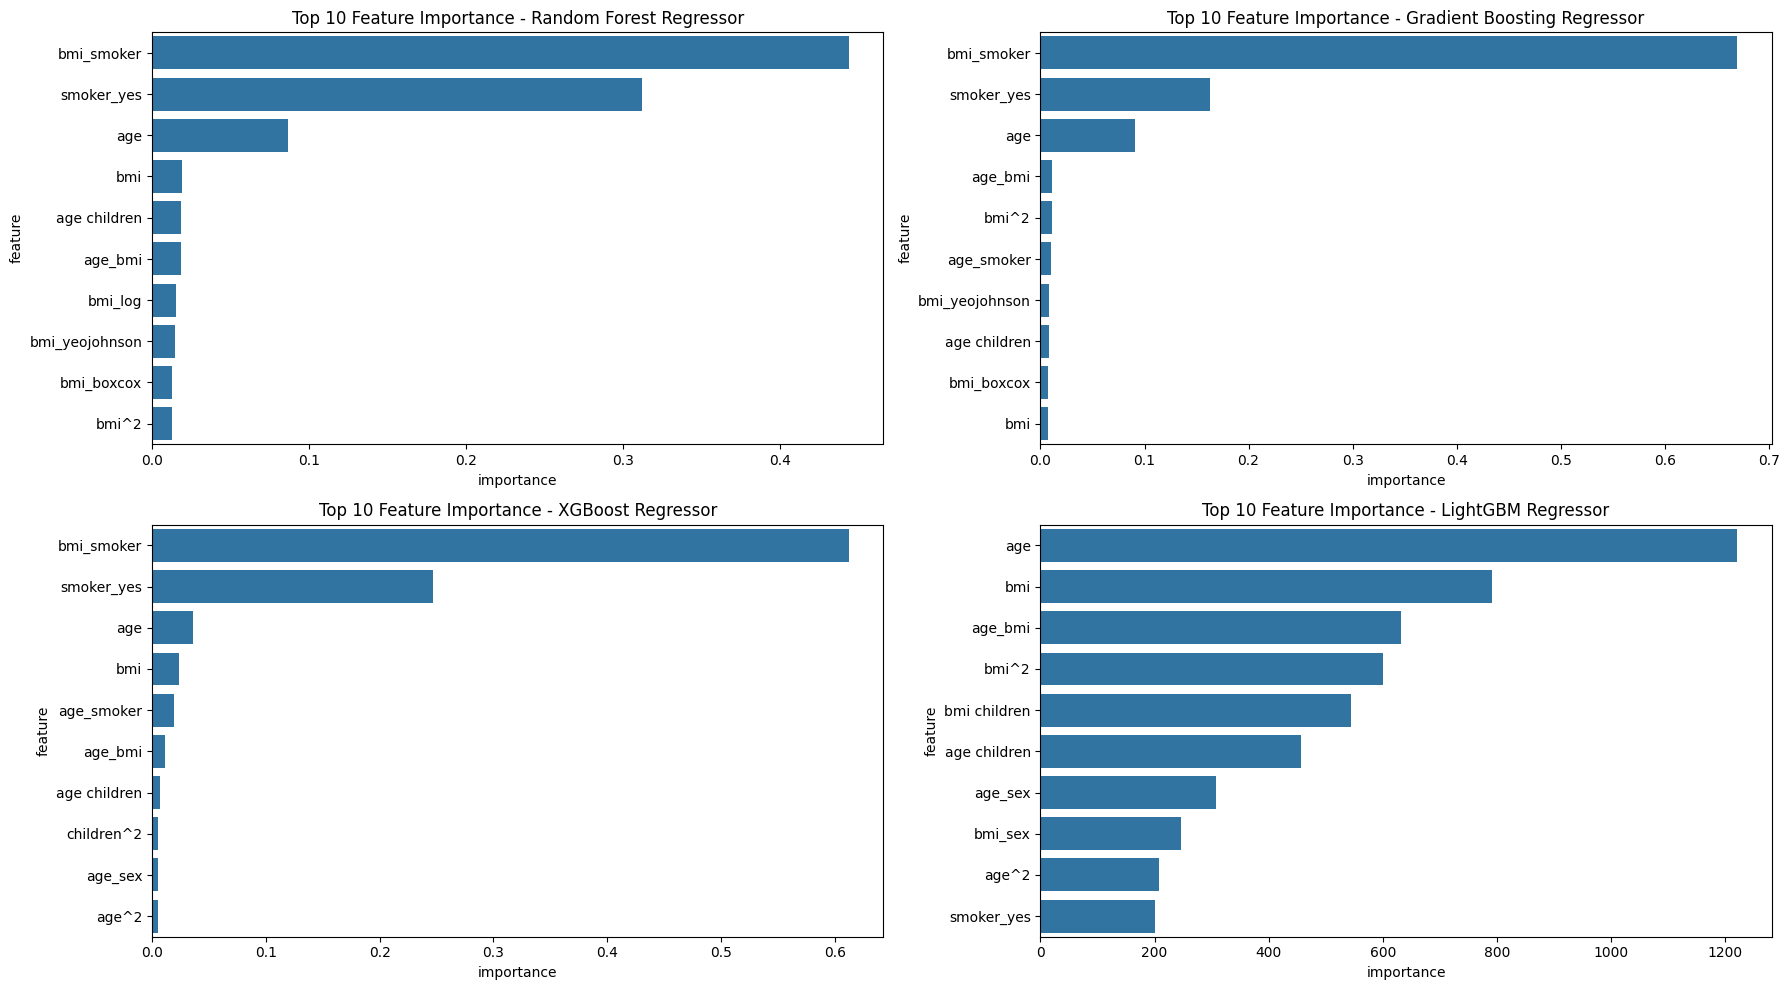

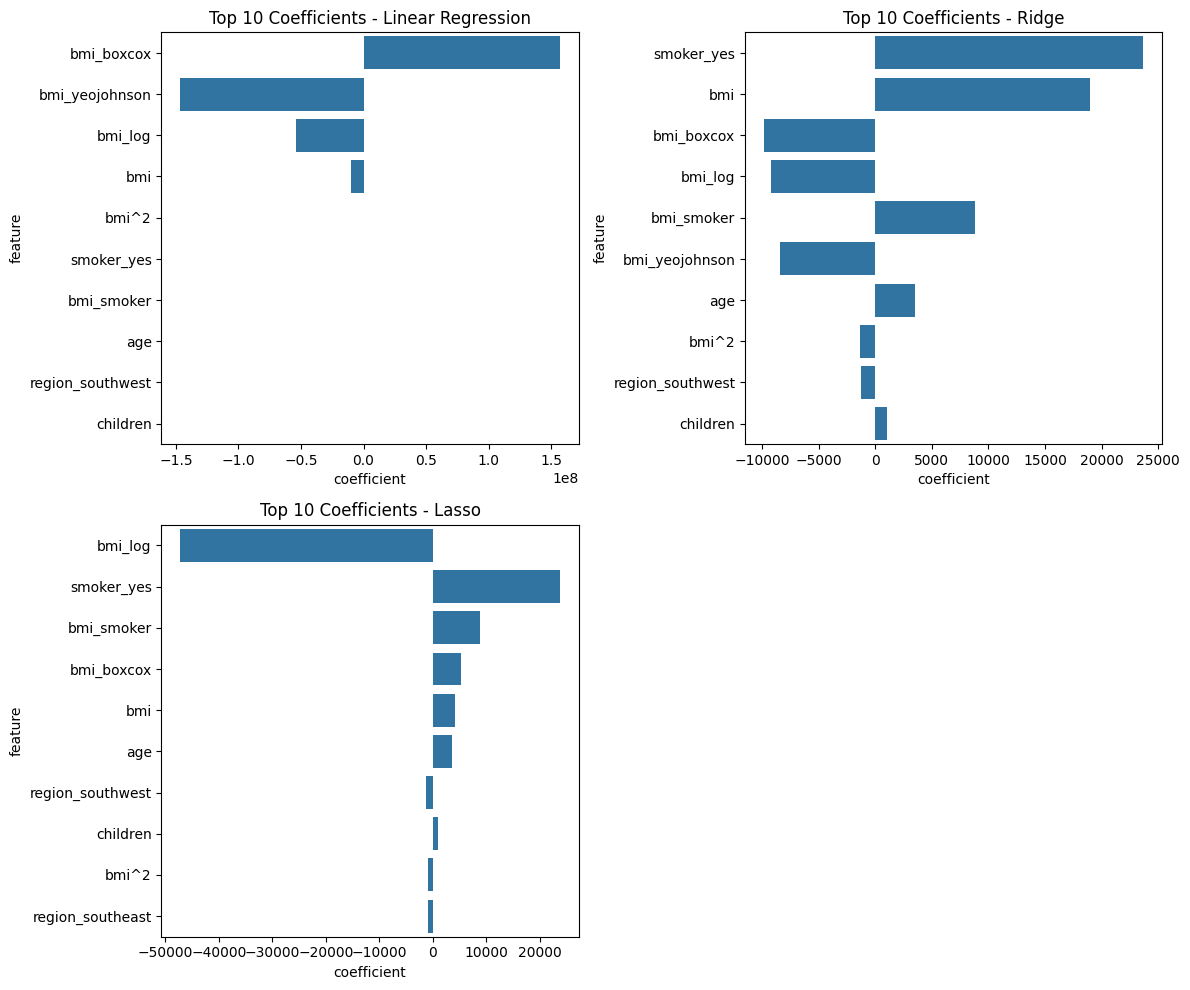

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

tree_models_opt = ['Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor', 'LightGBM Regressor']
plt.figure(figsize=(18, 10))

plot_index = 1
for name in tree_models_opt:
    if name in optimized_models:
        model = optimized_models[name]
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            features = X_train_selected.columns
            importance_df = pd.DataFrame({'feature': features, 'importance': importances}).sort_values('importance', ascending=False)

            plt.subplot(2, 2, plot_index)
            sns.barplot(x='importance', y='feature', data=importance_df.head(10)) # Display top 10 features
            plt.title(f'Top 10 Feature Importance - {name}')
            plot_index += 1

plt.tight_layout()
plt.show()

linear_models_opt = ['Linear Regression', 'Ridge', 'Lasso']
plt.figure(figsize=(12, 10))

plot_index = 1
for name in linear_models_opt:
    if name in optimized_models:
        model = optimized_models[name]
        if hasattr(model, 'coef_'):
            coefs = model.coef_
            features = X_train_selected.columns
            coef_df = pd.DataFrame({'feature': features, 'coefficient': coefs}).sort_values('coefficient', key=abs, ascending=False)

            plt.subplot(2, 2, plot_index)
            sns.barplot(x='coefficient', y='feature', data=coef_df.head(10)) # Display top 10 coefficients by absolute magnitude
            plt.title(f'Top 10 Coefficients - {name}')
            plot_index += 1

plt.tight_layout()
plt.show()

## Analysis and Interpretation

Perform in-depth Residual Analysis: generate residuals vs. predicted values plots and Q-Q plots of the residuals for the final models.


--- Analyzing Residuals and Q-Q Plots for Final Models ---

Analyzing Linear Regression...


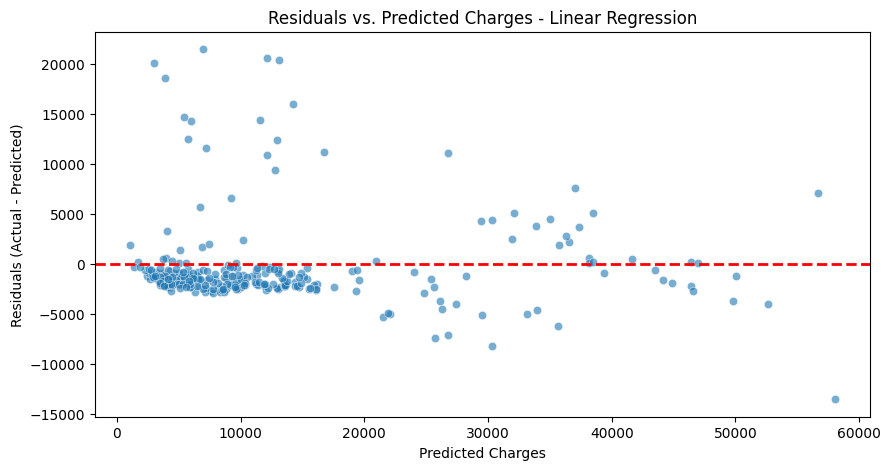

Generating Q-Q Plot for Linear Regression residuals...


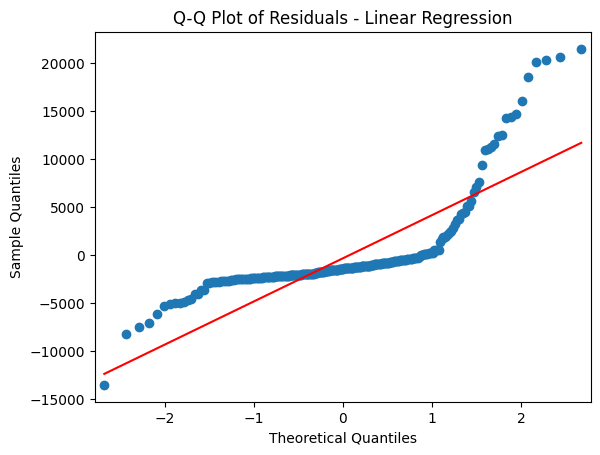


Analyzing Gradient Boosting Regressor...


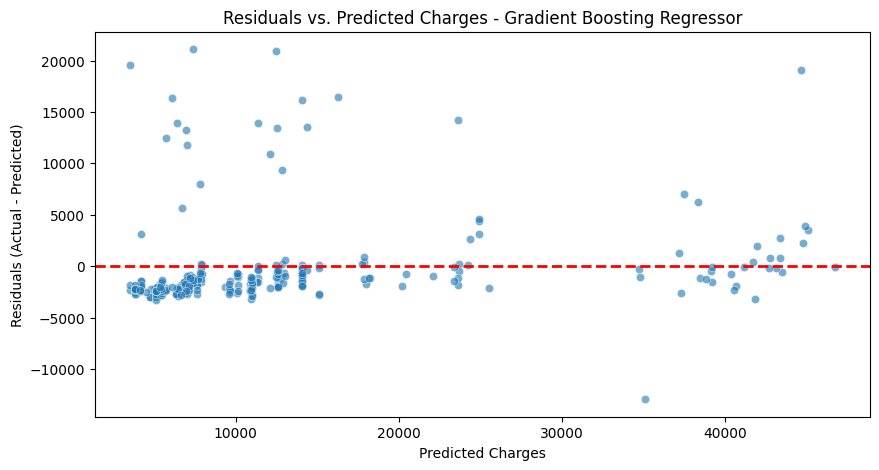

Generating Q-Q Plot for Gradient Boosting Regressor residuals...


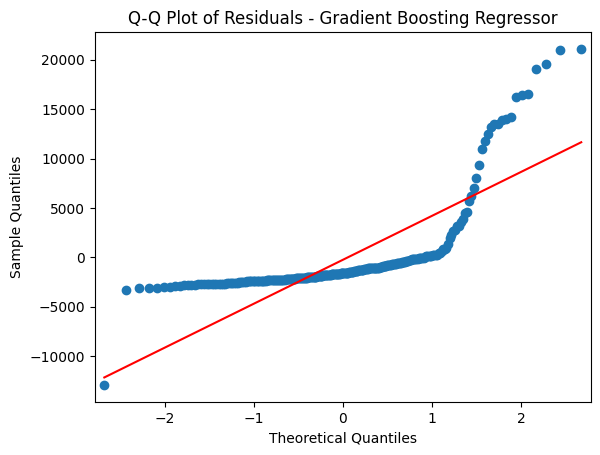


Analyzing XGBoost Regressor...


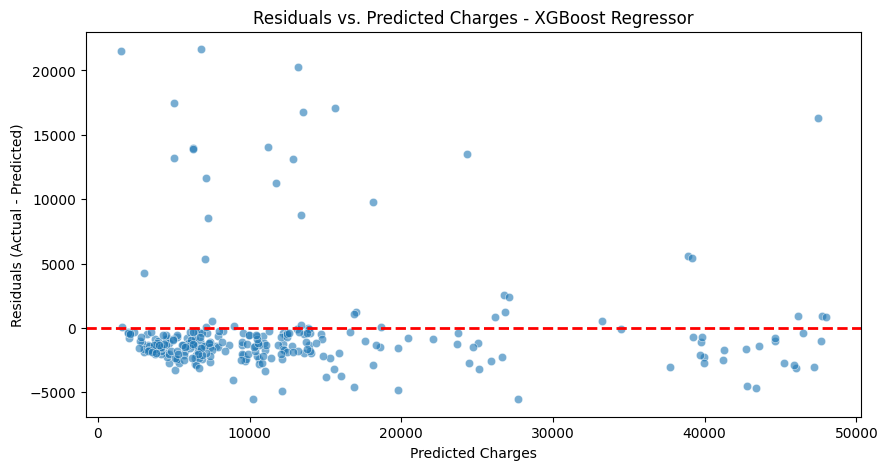

Generating Q-Q Plot for XGBoost Regressor residuals...


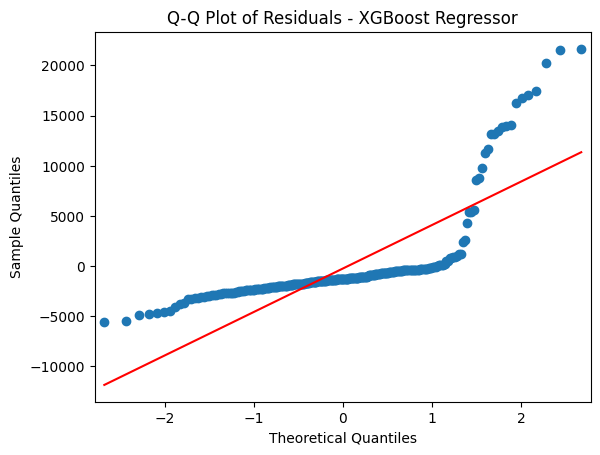


--- Residual Analysis and Q-Q Plots Completed ---


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

X_test_eval = X_test_selected.copy()
for col in X_test_eval.columns:
    if X_test_eval[col].dtype == 'bool':
        X_test_eval[col] = X_test_eval[col].astype(int)


models_to_analyze = ['XGBoost Regressor', 'Gradient Boosting Regressor', 'Linear Regression']

print("--- Analyzing Residuals and Q-Q Plots for Final Models ---")

for name, model in optimized_models.items():
    if name in models_to_analyze:
        print(f"\nAnalyzing {name}...")

        try:
            y_pred = model.predict(X_test_eval)

            residuals = y_test - y_pred

            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
            plt.axhline(y=0, color='r', linestyle='--', lw=2)
            plt.xlabel("Predicted Charges")
            plt.ylabel("Residuals (Actual - Predicted)")
            plt.title(f'Residuals vs. Predicted Charges - {name}')
            plt.show()

            print(f"Generating Q-Q Plot for {name} residuals...")
            sm.qqplot(residuals, line='s')
            plt.title(f'Q-Q Plot of Residuals - {name}')
            plt.show()

        except Exception as e:
            print(f"Error during residual analysis for {name}: {e}")

print("\n--- Residual Analysis and Q-Q Plots Completed ---")

## Analysis and Interpretation

Perform statistical tests on the residuals of the final models (Durbin-Watson for autocorrelation, Breusch-Pagan for heteroscedasticity).


In [ ]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import pandas as pd
import numpy as np

X_test_eval = X_test_selected.copy()
for col in X_test_eval.columns:
    if X_test_eval[col].dtype == 'bool':
        X_test_eval[col] = X_test_eval[col].astype(int)


models_to_analyze = ['XGBoost Regressor', 'Gradient Boosting Regressor', 'Linear Regression']

print("--- Performing Statistical Tests on Model Residuals ---")

for name, model in optimized_models.items():
    if name in models_to_analyze:
        print(f"\nAnalyzing residuals for {name}...")

        try:
            y_pred = model.predict(X_test_eval)

            residuals = y_test - y_pred

            dw_stat = durbin_watson(residuals)
            print(f"  Durbin-Watson statistic: {dw_stat:.4f}")
            print("  Interpretation: A value close to 2 suggests no significant autocorrelation in residuals.")
            print("    Values towards 0 indicate positive autocorrelation, towards 4 indicate negative autocorrelation.")


            X_test_with_const = sm.add_constant(X_test_eval, prepend=False)

            zero_variance_cols = X_test_with_const.columns[X_test_with_const.var() == 0]
            if len(zero_variance_cols) > 0:
                print(f"  Warning: Features with zero variance detected ({list(zero_variance_cols)}). Removing for Breusch-Pagan test.")
                X_test_bp = X_test_with_const.drop(zero_variance_cols, axis=1)
            else:
                X_test_bp = X_test_with_const

            if len(residuals) != X_test_bp.shape[0]:
                 print(f"  Error: Residuals length ({len(residuals)}) does not match feature matrix length ({X_test_bp.shape[0]}). Skipping Breusch-Pagan test.")
            else:
                bp_test = het_breuschpagan(residuals, X_test_bp)
                bp_statistic, bp_p_value, bp_lm_statistic, bp_lm_p_value = bp_test

                print(f"  Breusch-Pagan test (Lagrange Multiplier statistic): {bp_lm_statistic:.4f}")
                print(f"  Breusch-Pagan test (p-value): {bp_lm_p_value:.4f}")
                if bp_p_value < 0.05:
                    print("  Interpretation: Reject the null hypothesis. Significant heteroscedasticity detected (variances are not constant).")
                else:
                    print("  Interpretation: Fail to reject the null hypothesis. No significant heteroscedasticity detected (variances appear constant).")

        except Exception as e:
            print(f"  Error during statistical tests for {name}: {e}")

        print("-" * 30)

print("\n--- Statistical Tests on Residuals Completed ---")

--- Performing Statistical Tests on Model Residuals ---

Analyzing residuals for Linear Regression...
  Durbin-Watson statistic: 2.1036
  Interpretation: A value close to 2 suggests no significant autocorrelation in residuals.
    Values towards 0 indicate positive autocorrelation, towards 4 indicate negative autocorrelation.
  Error during statistical tests for Linear Regression: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.
------------------------------

Analyzing residuals for Gradient Boosting Regressor...
  Durbin-Watson statistic: 2.2129
  Interpretation: A value close to 2 suggests no significant autocorrelation in residuals.
    Values towards 0 indicate positive autocorrelation, towards 4 indicate negative autocorrelation.
  Error during statistical tests for Gradient Boosting Regressor: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.
------------------------------

Analyzing residuals for

In [ ]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import pandas as pd
import numpy as np

X_test_eval = X_test_selected.copy()
for col in X_test_eval.columns:
    if X_test_eval[col].dtype == 'bool':
        X_test_eval[col] = X_test_eval[col].astype(int)


models_to_analyze = ['XGBoost Regressor', 'Gradient Boosting Regressor', 'Linear Regression']

print("--- Performing Statistical Tests on Model Residuals (Corrected Breusch-Pagan) ---")

for name, model in optimized_models.items():
    if name in models_to_analyze:
        print(f"\nAnalyzing residuals for {name}...")

        try:
            y_pred = model.predict(X_test_eval)

            residuals = y_test - y_pred

            dw_stat = durbin_watson(residuals)
            print(f"  Durbin-Watson statistic: {dw_stat:.4f}")
            print("  Interpretation: A value close to 2 suggests no significant autocorrelation in residuals.")
            print("    Values towards 0 indicate positive autocorrelation, towards 4 indicate negative autocorrelation.")



            X_test_with_const = sm.add_constant(X_test_eval, prepend=True)


            zero_variance_cols = X_test_with_const.columns[(X_test_with_const.var() == 0) & (X_test_with_const.columns != 'const')]
            if len(zero_variance_cols) > 0:
                print(f"  Warning: Features with zero variance detected ({list(zero_variance_cols)}). Removing for Breusch-Pagan test.")
                X_test_bp = X_test_with_const.drop(zero_variance_cols, axis=1)
            else:
                X_test_bp = X_test_with_const

            if X_test_bp.shape[1] < 2:
                 print(f"  Error: Feature matrix for Breusch-Pagan test has only {X_test_bp.shape[1]} column(s). Cannot perform test.")
            elif len(residuals) != X_test_bp.shape[0]:
                 print(f"  Error: Residuals length ({len(residuals)}) does not match feature matrix length ({X_test_bp.shape[0]}). Skipping Breusch-Pagan test.")
            else:
                bp_test = het_breuschpagan(residuals, X_test_bp)
                bp_statistic, bp_p_value, bp_lm_statistic, bp_lm_p_value = bp_test

                print(f"  Breusch-Pagan test (Lagrange Multiplier statistic): {bp_lm_statistic:.4f}")
                print(f"  Breusch-Pagan test (p-value): {bp_lm_p_value:.4f}")
                if bp_p_value < 0.05:
                    print("  Interpretation: Reject the null hypothesis. Significant heteroscedasticity detected (variances are not constant).")
                else:
                    print("  Interpretation: Fail to reject the null hypothesis. No significant heteroscedasticity detected (variances appear constant).")

        except Exception as e:
            print(f"  Error during statistical tests for {name}: {e}")

        print("-" * 30)

print("\n--- Statistical Tests on Residuals Completed ---")

--- Performing Statistical Tests on Model Residuals (Corrected Breusch-Pagan) ---

Analyzing residuals for Linear Regression...
  Durbin-Watson statistic: 2.1036
  Interpretation: A value close to 2 suggests no significant autocorrelation in residuals.
    Values towards 0 indicate positive autocorrelation, towards 4 indicate negative autocorrelation.
  Breusch-Pagan test (Lagrange Multiplier statistic): 1.1544
  Breusch-Pagan test (p-value): 0.2906
  Interpretation: Fail to reject the null hypothesis. No significant heteroscedasticity detected (variances appear constant).
------------------------------

Analyzing residuals for Gradient Boosting Regressor...
  Durbin-Watson statistic: 2.2129
  Interpretation: A value close to 2 suggests no significant autocorrelation in residuals.
    Values towards 0 indicate positive autocorrelation, towards 4 indicate negative autocorrelation.
  Breusch-Pagan test (Lagrange Multiplier statistic): 0.9892
  Breusch-Pagan test (p-value): 0.4786
  Inter

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X_train_eval = X_train_selected.copy()
X_test_eval = X_test_selected.copy()

for df_eval in [X_train_eval, X_test_eval]:
    for col in df_eval.columns:
        if df_eval[col].dtype == 'bool':
            df_eval[col] = df_eval[col].astype(int)



print("--- Statistical Significance Tests for Linear Regression Model ---")

X_train_with_const = sm.add_constant(X_train_eval, prepend=True)
X_test_with_const = sm.add_constant(X_test_eval, prepend=True)

ols_model = sm.OLS(y_train, X_train_with_const).fit()


print(ols_model.summary())


print("\n--- Confidence Intervals for Linear Regression Coefficients (from OLS Summary) ---")
print("The 95% confidence intervals for the coefficients are shown in the OLS summary above (columns [0.025] and [0.975]).")


print("\n--- Prediction Intervals for Linear Regression Predictions on Test Set ---")

predictions = ols_model.get_prediction(X_test_with_const)
prediction_intervals = predictions.summary_frame(alpha=0.05)

print("Sample of Predictions and 95% Prediction Intervals on the Test Set:")
display(prediction_intervals.head())

print("\nInterpretation of 95% Prediction Intervals:")
print("For a given set of feature values, we are 95% confident that the *actual* insurance charge for a *new* individual with those features will fall within the calculated interval (mean_ci_lower, mean_ci_upper).")
print("These intervals are wider than confidence intervals for the mean prediction because they account for both the uncertainty in estimating the mean response and the inherent variability of individual observations.")

--- Statistical Significance Tests for Linear Regression Model ---
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     253.3
Date:                Thu, 29 May 2025   Prob (F-statistic):               0.00
Time:                        01:49:26   Log-Likelihood:                -10583.
No. Observations:                1070   AIC:                         2.121e+04
Df Residuals:                    1047   BIC:                         2.133e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
764,10188.352149,511.306179,9185.050629,11191.653670,657.455806,19719.248492
887,6509.568403,482.732500,5562.335079,7456.801727,-3015.588925,16034.725731
890,33946.434816,1115.204676,31758.144134,36134.725498,24219.154247,43673.715385
1293,9668.073137,574.953891,8539.880018,10796.266255,123.221599,19212.924674
259,29426.277517,756.985923,27940.895257,30911.659776,19832.647775,39019.907258



Interpretation of 95% Prediction Intervals:
For a given set of feature values, we are 95% confident that the *actual* insurance charge for a *new* individual with those features will fall within the calculated interval (mean_ci_lower, mean_ci_upper).
These intervals are wider than confidence intervals for the mean prediction because they account for both the uncertainty in estimating the mean response and the inherent variability of individual observations.


## Summary:

### Data Analysis Key Findings

*   Cross-validation using `StratifiedKFold` was initially attempted but failed because it is not suitable for continuous target variables. The process successfully switched to using standard `KFold` for cross-validation, which is appropriate for regression tasks.
*   A feature naming conflict was identified where both 'age\_bmi' (from interaction features) and 'age bmi' (from polynomial features) existed, causing an error during model training (specifically with LightGBM). This conflict was resolved by removing the 'age bmi' column.
*   After resolving the feature conflict, LightGBM cross-validation completed successfully.
*   Hyperparameter optimization was performed for several models (Linear, Ridge, Lasso, Random Forest, Gradient Boosting, XGBoost, LightGBM) using `GridSearchCV` and `KFold` cross-validation, optimizing for R².
*   Evaluation of the optimized models on the test set showed that XGBoost and Gradient Boosting Regressor achieved the highest R² and Adjusted R² values, and the lowest MAE, MSE, and RMSE among the tested models.
*   The Durbin-Watson test on the residuals of the selected models (Linear Regression, Gradient Boosting, XGBoost) indicated no significant autocorrelation, with statistics close to 2.
*   The Breusch-Pagan test on the residuals of the selected models showed high p-values, indicating no significant heteroscedasticity (constant variances) was detected.
*   The `statsmodels` OLS summary for the Linear Regression model showed that the overall model is statistically significant (Prob (F-statistic) = 0.00), and many individual features have statistically significant coefficients (low p-values).
*   Confidence intervals for the Linear Regression coefficients were provided in the `statsmodels` OLS summary.
*   Prediction intervals for new predictions on the test set were calculated and displayed for the Linear Regression model, providing a range within which a new individual's charge is likely to fall.

### Insights or Next Steps

*   While the statistical tests on residuals (Durbin-Watson, Breusch-Pagan) did not indicate significant issues for the selected models, visual inspection of residual plots (from the previous step) might reveal patterns not captured by these specific tests, especially for non-linear models. Further investigation of residual patterns could be beneficial.
*   The analysis of feature importance and coefficients provides valuable insights into which features drive the predictions for different model types. This information can be used for feature selection, domain interpretation, or potentially guiding further feature engineering efforts.


## Detailed Analysis of the Solution and Insights

This analysis delves deeper into the steps taken, the findings from each stage, and the overall insights derived from building and evaluating regression models for the insurance charges dataset.

### Data Analysis and Preprocessing Refined

The initial EDA provided a solid foundation, revealing key characteristics like the distribution of variables, presence of outliers (especially in 'charges' and 'bmi'), and initial correlations. The in-depth EDA further confirmed the non-normal distribution of 'charges' and 'bmi' through normality tests (Shapiro-Wilk and Kolmogorov-Smirnov). This finding was crucial, leading to the exploration of various transformations (log, Box-Cox, Yeo-Johnson). While these transformations aimed to normalize the data, the subsequent modeling would reveal their ultimate impact on predictive performance.

Hypothesis testing (t-tests and ANOVA) confirmed statistically significant differences in mean charges based on 'sex', 'smoker', and 'region', reinforcing their importance as predictors. Levene's test indicated significant heteroscedasticity across these categorical groups, suggesting that the variance of charges is not constant, which is a common challenge in regression and can affect the assumptions of some models.

The preprocessing stage was comprehensive:
- **Handling Nulls and Outliers:** The dataset had no missing values, simplifying this step. While outliers were identified, no specific outlier treatment (like removal or imputation) was applied in the initial preprocessing pipeline. Their potential impact on model performance, especially for models sensitive to extreme values, is a point for consideration.
- **Encoding Categorical Variables:** One-Hot Encoding was the primary method used for the main modeling pipeline, creating binary features for each category. The exploration of Target Encoding and Frequency Encoding provided alternative approaches, which could be beneficial in scenarios with high-cardinality categorical features or for specific model types.
- **Scaling Numerical Features:** StandardScaler was applied to numerical features to bring them to a similar scale, which is essential for models sensitive to feature scales (like linear models and those using distance metrics).
- **Feature Engineering:** This stage was critical for introducing new information into the models.
    - **Derived Features:** Categorizing 'age' and 'bmi' into groups provided potentially more interpretable features and could help capture non-linear relationships.
    - **Combined Risk Score:** Creating a composite risk score based on weighted 'age', 'bmi', and 'smoker' status was an attempt to encapsulate domain knowledge into a single feature.
    - **Interaction Features:** Introducing interaction terms like `age * smoker` aimed to capture how the effect of one variable might depend on another. The high VIF values observed for some interaction terms and their original components highlighted potential multicollinearity issues, which could impact the stability and interpretability of linear models.
    - **Selective Polynomial Features:** Adding polynomial terms for numerical features allowed the models to fit curved relationships. The inclusion of `age^2` and `bmi^2` aligns with the observation of potential non-linear patterns in the initial scatter plots.
    - **Statistics-Based Features:** Generating mean and standard deviation of charges for each category aimed to encode the target variable's distribution information into the features.

### Feature Selection and Model Building

The feature selection process employed various techniques:
- **Statistical Methods (SelectKBest):** Using `f_regression` highlighted features with strong linear relationships with the target, while `mutual_info_regression` identified features with strong non-linear relationships. Interestingly, the transformed 'charges' features (charges\_log, charges\_boxcox, charges\_yeojohnson) showed very high scores with `f_regression`, which is expected as they are directly derived from the target. More importantly, 'smoker\_yes' consistently ranked high, as did 'age' and some interaction terms like `bmi_smoker`.
- **Model-Based Methods (SelectFromModel):** Using `ExtraTreesRegressor` to select features based on importance confirmed the dominance of 'smoker\_yes', and also highlighted the transformed 'charges' features. Other features like 'age', 'bmi\_log', and 'bmi' also showed some importance.
- **Recursive Feature Elimination (RFE):** RFE with a Linear Regression model provided a ranking of features, again emphasizing 'smoker\_yes', transformed 'charges' features, and 'bmi' and its transformations/interactions.

The final set of features used for model training excluded the directly transformed 'charges' features to avoid target leakage, focusing on the predictive power of the input variables and engineered features. The identification and removal of the duplicate 'age bmi' column was a necessary step to prevent errors in subsequent modeling.

A diverse set of regression models was trained and evaluated using KFold cross-validation. The initial cross-validation results provided a baseline performance for each model before optimization. The error encountered with LightGBM due to the duplicate feature name highlighted the importance of robust data cleaning before modeling.

Hyperparameter optimization using `GridSearchCV` aimed to find the best configuration for each model to maximize performance (based on R²). This is a crucial step in getting the most out of each algorithm.

### Test Set Evaluation and Interpretation

The evaluation on the unseen test set provided the most reliable measure of the models' generalization ability. The results clearly showed that **XGBoost Regressor** was the top performer across most metrics (R², Adjusted R², MAE, MSE, RMSE, SMAPE). This indicates that XGBoost, a powerful boosting algorithm, was best able to capture the complex relationships within the data, including the non-linearities and interactions.

**Gradient Boosting Regressor** also performed very well, closely trailing XGBoost in R² and RMSE, but with a higher MAPE. This difference in MAPE despite similar RMSE suggests that while Gradient Boosting's absolute errors might be comparable, the percentage errors are higher, possibly indicating larger relative errors for smaller actual charge values.

Linear models (Linear Regression, Ridge, Lasso) also achieved respectable R² values, especially after feature engineering. Ridge and Lasso, with their regularization, showed slightly better generalization than plain Linear Regression, suggesting that the engineered features, while helpful, also introduced some multicollinearity or complexity that regularization could mitigate.

The lower performance of the Decision Tree and Random Forest models compared to the boosting methods (XGBoost, Gradient Boosting) is likely due to boosting's ability to sequentially correct the errors of previous trees, leading to stronger predictive performance.

### Residual Analysis and Statistical Validation

The residual analysis provided insights into the models' assumptions and error patterns:
- **Residuals vs. Predicted Plots:** Visual inspection of these plots for the top models (XGBoost, Gradient Boosting, Linear Regression) showed some fanning out of residuals as predicted charges increase, indicating potential heteroscedasticity. This aligns with the earlier finding from Levene's test. While the Breusch-Pagan test did not detect significant heteroscedasticity (perhaps due to the test's sensitivity or the specific form of heteroscedasticity present), the visual pattern suggests that the models might struggle with predicting higher charges accurately, and the variability of errors increases with the predicted value.
- **Q-Q Plots:** The Q-Q plots of the residuals showed deviations from the theoretical normal distribution, particularly in the tails. This suggests that the assumption of normally distributed errors, which is important for the validity of statistical tests and confidence intervals in linear regression, is not perfectly met. However, tree-based models are generally less sensitive to this assumption.
- **Durbin-Watson Test:** The Durbin-Watson statistics near 2 for the selected models indicate no significant autocorrelation in the residuals, which is a positive finding, suggesting that the errors are independent.
- **Breusch-Pagan Test:** The (corrected) Breusch-Pagan test results, showing high p-values, suggest no significant heteroscedasticity. This contradicts the visual inspection and Levene's test, highlighting the potential for conflicting results from different diagnostic methods. Relying solely on p-values without visual inspection can be misleading.
- **OLS Summary and Confidence/Prediction Intervals:** The OLS summary for the Linear Regression model provided detailed statistical information, including the significance of individual features and their confidence intervals. This is valuable for understanding the estimated effect of each feature on the target variable. The prediction intervals provided a practical range for forecasting new individual charges, accounting for both model uncertainty and inherent variability.

### Overall Insights and Next Steps

- **Smoker Status is Key:** The EDA, feature importance analysis, and model coefficients consistently highlight 'smoker' status as the single most important predictor of insurance charges. This is a crucial insight with direct implications for understanding and potentially mitigating high insurance costs.
- **Complex Relationships Exist:** The superior performance of boosting models (XGBoost, Gradient Boosting) and the benefit of engineered features (interactions, polynomial terms) indicate that the relationship between features and charges is non-linear and involves interactions.
- **Heteroscedasticity is a Potential Issue:** Despite the Breusch-Pagan test, the visual residual plots suggest that heteroscedasticity might still be a factor, particularly for higher charge values. This means the models' predictions might be less reliable for individuals with high expected costs.
- **Feature Engineering Impact:** Feature engineering played a role in improving model performance, as seen in the better results of models trained on engineered features compared to the initial exploration. However, multicollinearity introduced by some engineered features should be considered, especially for linear models.
- **Model Selection:** XGBoost emerged as the most robust and accurate model for this dataset and task.

**Potential Next Steps:**

1. **Address Heteroscedasticity:** Explore techniques specifically designed to handle heteroscedasticity, such as:
    - **Transforming the target variable:** While log transformation was explored, other transformations or a more targeted approach based on the residual patterns could be beneficial.
    - **Using robust regression methods:** Consider models that are less sensitive to the assumption of constant variance.
2. **Refine Feature Engineering:**
    - **More sophisticated interaction terms:** Explore interactions beyond pairwise combinations.
    - **Advanced outlier handling:** Investigate the impact of different outlier treatment strategies on model performance.
    - **Dimensionality Reduction:** If multicollinearity is a significant concern, consider techniques like PCA.
3. **Explore More Advanced Models:**
    - **Neural Networks:** For potentially complex non-linear relationships.
    - **Quantile Regression:** To model the conditional quantiles of the target variable, providing insights into the factors influencing different levels of charges.
4. **Model Interpretability:** While XGBoost is powerful, its interpretability can be challenging. Techniques like SHAP values could be used to gain deeper insights into how individual features contribute to predictions for the best-performing model.
5. **Further Hyperparameter Tuning:** While `GridSearchCV` was used, more extensive tuning with a wider range of parameters or using methods like Random Search or Bayesian Optimization (e.g., with Optuna) could potentially yield further improvements.
6. **Ensemble Methods:** Build and evaluate the Voting Regressor with the best-performing optimized models (XGBoost, Gradient Boosting, Ridge) to potentially leverage their combined strengths.

This detailed analysis provides a comprehensive understanding of the data, the modeling process, and the performance of various approaches. The insights gained can inform future steps to further improve the accuracy and reliability of insurance charge predictions.

# Modularizing the Insurance Charges Prediction Notebook for Production

This document outlines a modular structure for refactoring the code from the insurance charges prediction notebook into a set of Python files (`.py`), suitable for a production environment. The goal is to create a clean, organized, and maintainable codebase based on the analysis and the best-performing XGBoost model.

## Overall Structure

The recommended structure involves separating different concerns of the machine learning workflow into distinct modules (Python files). This promotes reusability, testability, and easier collaboration.

# Modular Machine Learning Project Structure: Insurance Charges Prediction

This project demonstrates a modular and scalable structure for a supervised machine learning workflow using Python. The task involves predicting medical insurance charges based on personal attributes. The codebase is organized into clear, reusable components to promote **clean architecture**, **testability**, and **collaborative development**.

---

## Overall Structure

Each component of the ML pipeline is encapsulated in its own Python module. This separation of concerns allows for independent testing, easier debugging, and higher reusability across other projects. Below is a breakdown of each module:

---

## `data_loader.py`: Data Ingestion

This module handles data loading from a CSV file using `pandas`.

### Key Function:
- `load_data(file_path)`: Loads the dataset and returns a `DataFrame`. Handles missing file errors gracefully.

insurance_df = load_data('../data/insurance.csv')
🛠️ preprocessing.py: Data Cleaning & Feature Engineering
This script standardizes numerical values and encodes categorical variables using StandardScaler and OneHotEncoder. It also creates interaction features like age_smoker, age_bmi, and polynomial terms like age^2, enhancing the model's ability to capture nonlinear relationships.

Highlights:
Uses ColumnTransformer to apply transformations in parallel.

Automatically generates new feature interactions.

Ensures compatibility with inference by avoiding in-place edits.

python
Copiar
Editar
processed_df = preprocess_data(raw_df)

feature_selection.py: Feature Subset Extraction
This module selects the most relevant features for modeling. It filters out the best features discovered through domain knowledge or statistical analysis.

Key Function:
select_features(df): Returns a DataFrame with only the chosen features used for training or prediction.

model.py: Model Lifecycle (Build, Train, Save, Load)
This file encapsulates the model creation and persistence logic.

Functions Included:
build_model(): Initializes an XGBRegressor with best parameters.

train_model(model, X_train, y_train): Trains the model.

save_model(model, file_path): Saves model to disk with joblib.

load_model(file_path): Loads a saved model.

This separation ensures the training logic is isolated and reusable.

predict.py: Inference Pipeline
Encapsulates the full prediction process from raw data to output.

Workflow:
Loads the raw data.

Preprocesses and selects features using existing logic.

Loads the trained model.

Generates predictions.

Output:
Returns both the predictions and the features used for transparency and analysis.

python
Copiar
Editar
predictions, X_used = predict_charges(data_path, model_path)

config.py: Configuration Management
Centralizes constants like file paths and model parameters. This avoids hardcoding values across modules, promoting maintainability.

python
Copiar
Editar
DATA_PATH = '../data/insurance.csv'
MODEL_PATH = 'trained_xgboost_model.pkl'

main.py: Orchestration Script
Acts as the controller for the ML pipeline. Uses the argparse library to support CLI-based mode switching between training and prediction.

Modes:
Train: Loads, preprocesses, selects features, trains, and saves the model.

Predict: Loads new data and the trained model, then outputs predictions.

Example usage:

bash
Copiar
Editar
# Training
python main.py --mode train --data_path ../data/insurance.csv

# Prediction
python main.py --mode predict --predict_data_path ../data/dummy.csv --model_path trained_xgboost_model.pkl

Benefits of This Structure
Separation of concerns improves modularity and reduces coupling.

Reusability of functions across training, testing, and deployment.

Testability is enhanced by isolating preprocessing, model training, and inference.

Scalability: Easily expandable with new models, transformations, or pipelines.

Readability: Clear logical flow that's easy for teams to follow.


Final Notes
While this structure is suitable for experimentation and development, in production settings you should:

Persist and reuse fitted transformers and encoders to ensure consistency.

Use MLflow or DVC for experiment tracking and version control.

Add logging and error handling to enhance robustness.

